In [2]:
# i am a student taking classes through codecademy. as part of the business intelligence data analytics coursework i have been
# assigned two related sets of data to explore, clean, and analyze. the assignment from codecademy reads:

    # For this project, you will interpret data from the National Parks Service about endangered species in different parks.

    # You will perform some data analysis on the conservation statuses of these species and investigate if there are any patterns
    # or themes to the types of species that become endangered. During this project, you will analyze, clean up, and plot data as
    # well as pose questions and seek to answer them in a meaningful way.

    # After you perform your analysis, you will share your findings about the National Park Service.

# there was no readme included with the two provided datasets, so i will need to ramain aware
# of my assumptions about what the data represents and how the data was collected.


# planning out my analysis is one aspect of this project, and while i have a general idea of the questions i would like to ask
# of and have answered by this data, i will need to suss out what this data contains in order to refine the phrasing of my question.
# as it stands i would like to learn the following:

# what plants and animals, specifically and generally, are most at risk of endangerment?
    # this dataset is not as comprehensive as i initially thought, so this might not be the best statistic to hunt for

# what national parks have the greatest diversity of lifeforms?
    # turns out its all the same

# what is the ratio for each national park of non-endangered life to endangered life?
# by both actual quantities of living thing and by number of unique species
    # still has merit

# do certain national parks contain greater or fewer numbers of endangered/conservationally-noted species?
    # data for all four parks is comprised of the same unique species

# are there relationships between any of the species with a conservation status that is not 'Not Threatened'?

# are there any relationships between population size of species with one another regardless of conservation_status?

# what types of life forms are more or less endangered at each national park?
    # same across all four parks as noted above



# assumptions:
# i have to base my analysis on the assumption that the data collected from each national park represents the same relative sample size
# and collection technique for each of the national parks as i cannot confirm that the data from each national park was collected with
# the same level of thoroughness, or if the data was collected by the same people using consistent collection techniques vs collected
# by different people at each location who each might have a different standard for data handling or acute observation.



In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

observations = pd.read_csv('observations.csv')
species_info = pd.read_csv('species_info.csv')

In [4]:
observations.describe(include='all')

,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Myotis lucifugus,Great Smoky Mountains National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


In [5]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [6]:
# dupes?
observations.duplicated().any()

True

In [7]:
# dupes.
observations.drop_duplicates(inplace=True)

In [8]:
species_info.describe(include='all')

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [9]:
species_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [10]:
# conservation_status is full of nans
species_info['conservation_status'].unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [11]:
# based on this i am making the assumption that nan values in this column represent that the associated species
# is not threatened, so i am updating the nans to reflect that and to make my life easier going forward.
# https://en.wikipedia.org/wiki/United_States_Fish_and_Wildlife_Service_list_of_endangered_mammals_and_birds
# wikipedia says the language is endangered or threatened, so i will just fill nans with 'Not Threatened'.
species_info['conservation_status'] = species_info['conservation_status'].fillna('Not Threatened')

In [12]:
# checking to see if there are any duplicate rows
species_info.duplicated().any()

False

In [13]:
species_info['category'].unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [14]:
# renaming 'category' to 'taxon' since the values within this column represent taxonomic classifications of life

# taxon is singular, taxa is plural

# https://en.wikipedia.org/wiki/Taxon
species_info.columns = ['taxon', 'scientific_name', 'common_names', 'conservation_status']

In [15]:
# since both frames have a scientific_name column with the exact same number of uniques, i want to confirm these uniques are identical

unique_observations_name = set(observations['scientific_name'].unique())

unique_species_info_name = set(species_info['scientific_name'].unique())

print(unique_observations_name == unique_species_info_name)

True


In [16]:
# species info having multiple instances of scientific names is perplexing to me, so i want to figure out why it is the way it is

value_counts = species_info.scientific_name.value_counts()
value_counts_filtered = value_counts[value_counts > 1].index
multiple_entries_df = species_info[species_info['scientific_name'].isin(value_counts_filtered)]
multiple_entries_df = multiple_entries_df.sort_values(by='scientific_name')
multiple_entries_df.head()

,taxon,scientific_name,common_names,conservation_status
5553,Vascular Plant,Agrostis capillaris,"Colonial Bent, Colonial Bentgrass",Not Threatened
2132,Vascular Plant,Agrostis capillaris,Rhode Island Bent,Not Threatened
2134,Vascular Plant,Agrostis gigantea,Redtop,Not Threatened
5554,Vascular Plant,Agrostis gigantea,"Black Bent, Redtop, Water Bentgrass",Not Threatened
4178,Vascular Plant,Agrostis mertensii,"Arctic Bentgrass, Northern Bentgrass",Not Threatened


In [17]:
# based on a visual inspection of these apparent duplicate rows i am guessing the common names are the differentiating factor,
# so i am going to combine/concatenate the common_name across rows that share a scientific name so long as conservation_status
# is also identical across rows that share a scientific name

# check for dupes, if true my guesstimation was accurate, or at least partially accurate
columns_to_check = ['taxon', 'scientific_name', 'conservation_status']
duplicates = species_info.duplicated(subset=columns_to_check, keep=False).any()
print(duplicates)

True


In [18]:
# combine common names from duplicated rows so no words are lost - i plan to handle duplicates within observations later
species_info = species_info.groupby(columns_to_check).agg({'common_names': ', '.join}).reset_index()

In [19]:
species_info.describe(include='all')

,taxon,scientific_name,conservation_status,common_names
count,5543,5543,5543,5543
unique,7,5541,5,5238
top,Vascular Plant,Oncorhynchus mykiss,Not Threatened,Brachythecium Moss
freq,4262,2,5363,7


In [20]:
# some duplicates persist, so lets take a look at what they are this time using the same thing as last time
value_counts = species_info.scientific_name.value_counts()
value_counts_filtered = value_counts[value_counts > 1].index
multiple_entries_df = species_info[species_info['scientific_name'].isin(value_counts_filtered)]
multiple_entries_df = multiple_entries_df.sort_values(by='scientific_name')
multiple_entries_df.head()

,taxon,scientific_name,conservation_status,common_names
705,Mammal,Canis lupus,Endangered,"Gray Wolf, Gray Wolf, Wolf"
706,Mammal,Canis lupus,In Recovery,"Gray Wolf, Wolf"
664,Fish,Oncorhynchus mykiss,Not Threatened,Rainbow Trout
665,Fish,Oncorhynchus mykiss,Threatened,Rainbow Trout


In [21]:
# it appears that these entries were updated, and given that the indexes are in sequential order i will operate on
# the assumption that a larger index indicates an update to the original values
species_info = species_info.drop([664, 705])

In [22]:
species_info.describe(include='all')

,taxon,scientific_name,conservation_status,common_names
count,5541,5541,5541,5541
unique,7,5541,5,5237
top,Vascular Plant,Acris crepitans crepitans,Not Threatened,Brachythecium Moss
freq,4262,1,5362,7


In [23]:
# lets take a look at the spread of conservation statuses by taxa

In [24]:
# now i want to go back and clean up common_names that had some concatenating. i want to preserve all unique
# descriptors, so i will split by ',' and ' ', then create a set of the individual words to ensure no duplicates,
# then strip any parentheses, then recombine into single strings for easy searching
species_info.common_names = (
    species_info.common_names
    .str.split(r'[, ]')
    .apply(set)
    .apply(list)
    .apply(lambda lst: [item.strip("()") for item in lst])
    .str.join(' ')
)

In [25]:
species_info['conservation_status'].value_counts()

conservation_status
Not Threatened        5362
Species of Concern     151
Endangered              14
Threatened              10
In Recovery              4
Name: count, dtype: int64

In [26]:
# define list here so i can refer to it below
taxa = species_info['taxon'].unique().tolist()
print(taxa)
# there are 7 kingdoms of life in modern biology according to wikipedia:
# https://en.wikipedia.org/wiki/Kingdom_(biology)
# but they do not match up with the 7 unique values in the column taxon

# i cant expect a biological survey of this scale to include microscopic or single-celled
# organisms, but even if we do not consider such life this dataset cant be inclusive of
# all life in these four parks, as it is missing other taxonomic categories of life such as
# fungi and invertebrates

['Amphibian', 'Bird', 'Fish', 'Mammal', 'Nonvascular Plant', 'Reptile', 'Vascular Plant']


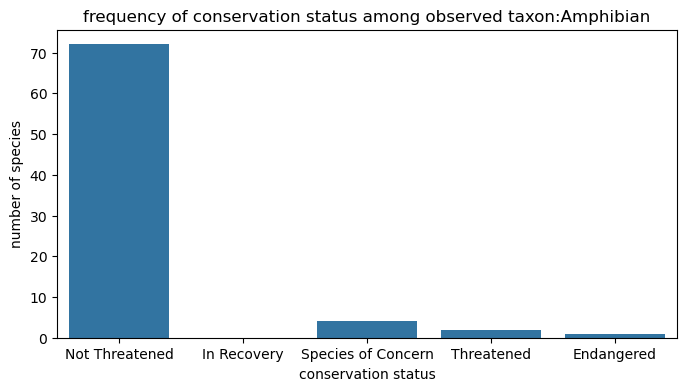

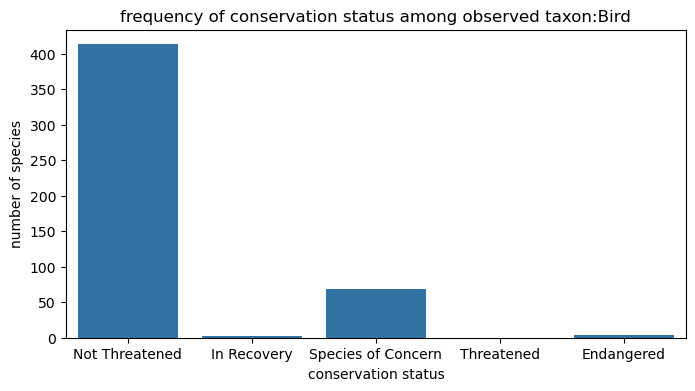

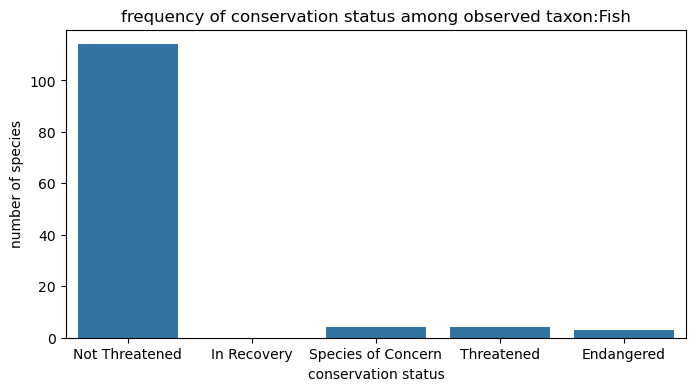

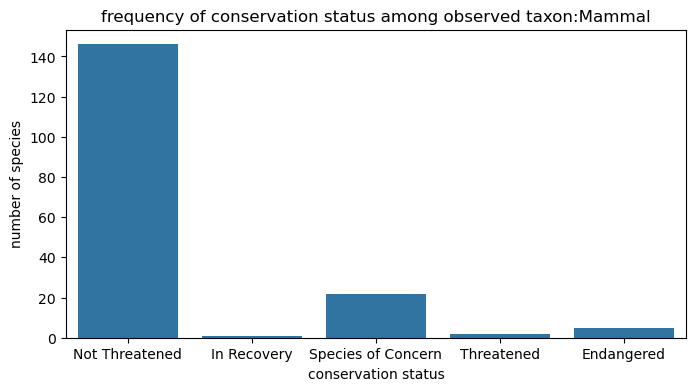

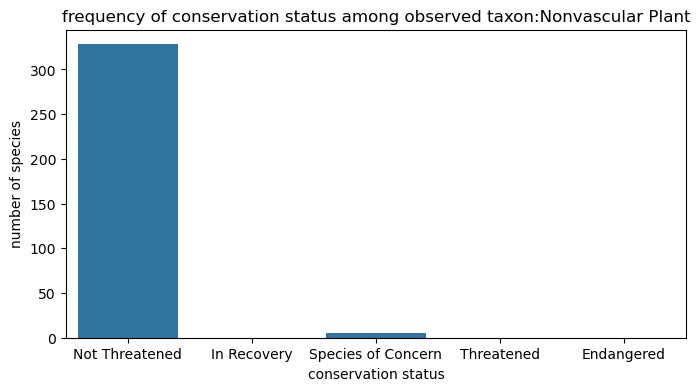

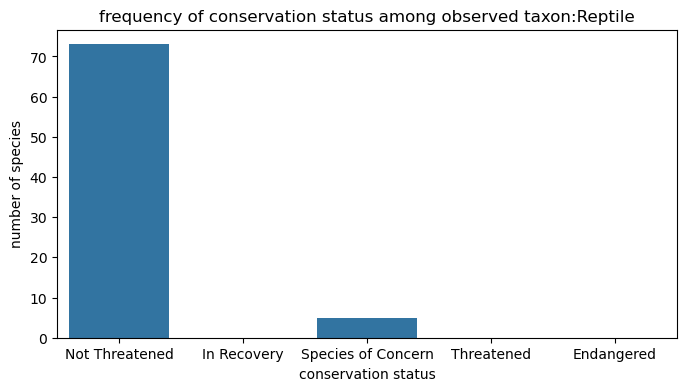

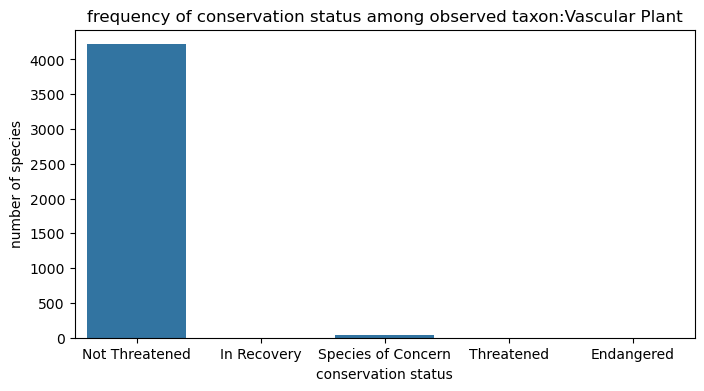

In [27]:
# i want to take a quick look at distribution of conservation status filtered by taxon.
# if we include 'Not Threatened' the results are kind of goofy, so i will provide an order when calling
# .countplot() to plot only the not-not-threatened numbers
for value in taxa:
    # create new figure and ax
    fig, ax = plt.subplots(figsize=(8, 4))
    # filter dataset
    species_data = species_info[species_info['taxon'] == value]
    # countplot of values in conservation status by value in taxon
    sns.countplot(
        data=species_data,
        x='conservation_status',
        ax=ax,
        order=[
            'Not Threatened',        # comment out this line to show graphs without not threatened
            'In Recovery',
            'Species of Concern',
            'Threatened',
            'Endangered',
        ],
    )

    ax.set_xlabel('conservation status')
    ax.set_ylabel('number of species')

    ax.set_title(f'frequency of conservation status among observed taxon:{value}')

    plt.show()

In [28]:
# i would like to be able to explore what types of species are most at risk with greater granularity
# i want to use the now-clean common_names to find:

# frequency of each unique word in common_names
# AND
# frequency of each unique word in common_names when filtered by conservation status

# so now i will:
    # create subframe of species_info (by taxon)
    # create word dataframe to store words and counts (by taxon)
    # identify frequency of unique words in subframe
    # store frequency of unique words in words dataframe
        # for each conservation status
        # filter subframe by conservation_status
        # identify new frequency of unique words in filtered subframe
        # store new frequency of unique words in words dataframe
    # store updated words dataframe in dictionary

# empty dictionary to store frames in
word_count_by_taxon = {}

for value in taxa:
    # create subframe of species_info (by taxon)
    species_info_filtered = species_info[species_info['taxon'] == value]
    # create word dataframe to store words and counts (by taxon)
    word_counts_df = pd.DataFrame()
    # create series of all unique words and value counts from species_info_filtered
    all_common_names = ' '.join(species_info_filtered['common_names'])
    all_common_names_words = all_common_names.split()
    all_status_word_counts = pd.Series(all_common_names_words).value_counts()
    # store series in word_counts_df, unique words are set to index by default
    word_counts_df['all_statuses'] = all_status_word_counts
    # get value counts for words when subframe further filtered by conservation status
    for status in species_info_filtered['conservation_status'].unique():
        # filter species_info_filtered by conservation status
        status_filtered_data = species_info_filtered[species_info_filtered['conservation_status'] == status]
        # identify new frequency of unique words in filtered subframe
        all_common_names = ' '.join(status_filtered_data['common_names'])
        all_common_names_words = all_common_names.split()
        status_word_counts = pd.Series(all_common_names_words).value_counts()
        # store new frequency of unique words in words dataframe
        word_counts_df[status] = status_word_counts

    # remove unnecessary column
    word_counts_df = word_counts_df.drop(columns=['Not Threatened'])
    # store updated words dataframe in dictionary
    word_count_by_taxon[value] = word_counts_df

In [29]:
# all these dataframes have capitals in their columns so im going to clean those up with another dictionary
column_cleanup_dict = {
    'Species of Concern': 'species_of_concern',
    'In Recovery': 'in_recovery',
    'Endangered': 'endangered',
    'Threatened': 'threatened',
}
# so now columns in all taxon_words_df should be: 'all_statuses', 'not_threatened', and then any combination
# of 'species_of_concern', 'in_recovery', 'endangered', and 'threatened' that exist for those words.

In [30]:
# iterate through dictionary of dataframes
for taxon, dataframe in word_count_by_taxon.items():
    # rename columns in each dataframe with cleanup dictionary
    dataframe = dataframe.rename(columns = column_cleanup_dict)
    # update dictionary with modified dataframe
    word_count_by_taxon[taxon] = dataframe

In [31]:
# now i want to move all those dataframes out of the dictionary and assign them usable handles
amphibian_words_df = word_count_by_taxon['Amphibian']
bird_words_df = word_count_by_taxon['Bird']
fish_words_df = word_count_by_taxon['Fish']
mammal_words_df = word_count_by_taxon['Mammal']
nonvascular_plant_words_df = word_count_by_taxon['Nonvascular Plant']
reptile_words_df = word_count_by_taxon['Reptile']
vascular_plant_words_df = word_count_by_taxon['Vascular Plant']

In [32]:
amphibian_words_df.head(8)

,all_statuses,threatened,species_of_concern,endangered
Salamander,41,NaN,2.0,NaN
Frog,14,1.0,1.0,1.0
Northern,8,NaN,NaN,NaN
Toad,8,1.0,NaN,NaN
Eastern,7,NaN,1.0,NaN
Southern,6,NaN,NaN,NaN
Chorus,5,NaN,NaN,NaN
Mud,4,NaN,NaN,NaN


In [33]:
bird_words_df.head(60)

,all_statuses,species_of_concern,in_recovery,endangered
Warbler,59,2.0,NaN,1.0
Sparrow,28,4.0,NaN,NaN
American,21,3.0,1.0,NaN
Flycatcher,17,3.0,NaN,NaN
Common,17,2.0,NaN,NaN
Northern,17,2.0,NaN,NaN
Owl,15,2.0,NaN,NaN
Woodpecker,11,2.0,NaN,1.0
Sandpiper,11,1.0,NaN,NaN
Western,11,3.0,NaN,NaN


In [34]:
fish_words_df.head(8)

,all_statuses,endangered,species_of_concern,threatened
Shiner,20,NaN,NaN,NaN
Darter,19,1.0,2.0,NaN
Trout,9,NaN,NaN,2.0
Chub,7,NaN,1.0,1.0
Sucker,7,1.0,NaN,NaN
Dace,7,NaN,NaN,NaN
Sunfish,5,NaN,NaN,NaN
Mountain,5,NaN,NaN,NaN


In [35]:
mammal_words_df.iloc[:60]

,all_statuses,species_of_concern,in_recovery,endangered,threatened
Bat,18,7.0,NaN,1.0,1.0
Mouse,15,NaN,NaN,NaN,NaN
Shrew,14,1.0,NaN,NaN,NaN
Myotis,13,9.0,NaN,2.0,1.0
Squirrel,12,NaN,NaN,1.0,NaN
Chipmunk,12,NaN,NaN,NaN,NaN
Eastern,11,1.0,NaN,NaN,NaN
American,11,1.0,NaN,NaN,NaN
Western,10,1.0,NaN,NaN,NaN
Vole,10,NaN,NaN,NaN,NaN


In [36]:
nonvascular_plant_words_df.head(8)

,all_statuses,species_of_concern
Moss,280,2.0
Sphagnum,13,NaN
Dicranum,9,NaN
Hypnum,8,NaN
Bryum,8,NaN
Brachythecium,8,NaN
Fissidens,7,NaN
Pohlia,7,NaN


In [37]:
reptile_words_df.head(8)

,all_statuses,species_of_concern
Snake,27,3.0
Northern,15,2.0
Turtle,11,NaN
Eastern,11,NaN
Lizard,9,1.0
Skink,7,NaN
Kingsnake,6,1.0
Garter,5,NaN


In [38]:
vascular_plant_words_df.head(8)

,all_statuses,species_of_concern,endangered,threatened
Sedge,224,1.0,NaN,NaN
Common,139,1.0,NaN,NaN
Grass,126,3.0,NaN,NaN
Mountain,123,4.0,1.0,NaN
White,88,1.0,NaN,NaN
Western,83,1.0,NaN,NaN
Wild,81,2.0,NaN,NaN
Yellow,78,NaN,NaN,NaN


In [39]:
# lets see if i can filter these down to the words used to describe species that are not not_threatened
# so this will just return the rows containing words used to describe species that are considered either
# 'in_recovery', 'species_of_concern', 'endangered', or 'threatened'. then i will sort them by frequency
# of use to describe at risk species. this will give me a list of words that should be able to tell us a
# story about the differences between the four national parks in this dataset.
def conservation_words_filter(df):
    # create mask and apply inverse of mask
    mask = df.iloc[:, 1:].isnull().all(axis=1)
    filtered_df = df[~mask].copy()
    # create column to store the number of times a word was used to describe an at risk species
    filtered_df['num_at_risk'] = filtered_df.iloc[:, 1:].sum(axis=1)
    # sort by those numbers
    filtered_df = filtered_df.sort_values('num_at_risk', ascending=False)
    return filtered_df

In [40]:
# create filtered dataframes of words
at_risk_amphibian_words_df = conservation_words_filter(amphibian_words_df)

at_risk_bird_words_df = conservation_words_filter(bird_words_df)

at_risk_fish_words_df = conservation_words_filter(fish_words_df)

at_risk_mammal_words_df = conservation_words_filter(mammal_words_df)

at_risk_nonvascular_plant_words_df = conservation_words_filter(nonvascular_plant_words_df)

at_risk_reptile_words_df = conservation_words_filter(reptile_words_df)

at_risk_vascular_plant_words_df = conservation_words_filter(vascular_plant_words_df)

In [41]:
at_risk_amphibian_words_df.shape

(16, 5)

In [42]:
at_risk_amphibian_words_df.head(8)

,all_statuses,threatened,species_of_concern,endangered,num_at_risk
Frog,14,1.0,1.0,1.0,3.0
Salamander,41,NaN,2.0,NaN,2.0
Toad,8,1.0,NaN,NaN,1.0
Eastern,7,NaN,1.0,NaN,1.0
Sierra,3,NaN,NaN,1.0,1.0
Spotted,3,NaN,1.0,NaN,1.0
Nevada,2,NaN,NaN,1.0,1.0
California,2,1.0,NaN,NaN,1.0


In [43]:
# choosing some target words to explore for each taxon
amphibian_words = [
    'frog',
    'salamander',
    'toad',
]

In [44]:
at_risk_bird_words_df.shape

(122, 5)

In [45]:
at_risk_bird_words_df.head(30)

,all_statuses,species_of_concern,in_recovery,endangered,num_at_risk
American,21,3.0,1.0,NaN,4.0
Sparrow,28,4.0,NaN,NaN,4.0
Hawk,8,4.0,NaN,NaN,4.0
Warbler,59,2.0,NaN,1.0,3.0
Woodpecker,11,2.0,NaN,1.0,3.0
Western,11,3.0,NaN,NaN,3.0
Falcon,3,2.0,1.0,NaN,3.0
Flycatcher,17,3.0,NaN,NaN,3.0
Owl,15,2.0,NaN,NaN,2.0
Heron,5,2.0,NaN,NaN,2.0


In [46]:
birds_words = [
    'hawk',
    'falcon',
    'kite',
    'eagle',
    'owl',
    'sparrow',
    'warbler',
    'flycatcher',
    'woodpecker',
]

In [47]:
at_risk_fish_words_df.shape

(18, 5)

In [48]:
at_risk_fish_words_df.head(8)

,all_statuses,endangered,species_of_concern,threatened,num_at_risk
Darter,19,1.0,2.0,NaN,3.0
Chub,7,NaN,1.0,1.0,2.0
Madtom,2,1.0,NaN,1.0,2.0
Trout,9,NaN,NaN,2.0,2.0
Yellowfin,1,NaN,NaN,1.0,1.0
June,1,1.0,NaN,NaN,1.0
Duskytail,1,1.0,NaN,NaN,1.0
Blotchside,1,NaN,1.0,NaN,1.0


In [49]:
fish_words = [
    'darter',
    'trout',
    'chub',
    'madtom',
]

In [50]:
at_risk_mammal_words_df.shape

(49, 6)

In [51]:
at_risk_mammal_words_df.head(16)

,all_statuses,species_of_concern,in_recovery,endangered,threatened,num_at_risk
Myotis,13,9.0,NaN,2.0,1.0,12.0
Bat,18,7.0,NaN,1.0,1.0,9.0
Sierra,4,2.0,NaN,1.0,NaN,3.0
Nevada,4,2.0,NaN,1.0,NaN,3.0
Brown,3,2.0,NaN,NaN,NaN,2.0
Bighorn,2,1.0,NaN,1.0,NaN,2.0
Red,8,1.0,NaN,1.0,NaN,2.0
Northern,8,NaN,NaN,1.0,1.0,2.0
Gray,5,NaN,1.0,1.0,NaN,2.0
Long-Eared,4,1.0,NaN,NaN,1.0,2.0


In [52]:
mammal_words = [
    'myotis',      # i looked this up, its a type of bat, so i will need to account for overlap during analysis
    'bat',
    'wolf',
    'sheep',       # i want to confirm below that these reference actual sheep
    'bear',
    'hare',
    'rabbit',
    'shrew',
    'squirrel',
]

In [53]:
at_risk_nonvascular_plant_words_df.shape

(10, 3)

In [54]:
at_risk_nonvascular_plant_words_df.head(8)

,all_statuses,species_of_concern,num_at_risk
Moss,280,2.0,2.0
Plagiomnium,4,1.0,1.0
Bazzania,4,1.0,1.0
Carolina,3,1.0,1.0
Appalachian,3,1.0,1.0
Screw-Moss,2,1.0,1.0
Ammon's,1,1.0,1.0
Sharp's,1,1.0,1.0


In [55]:
nonvascular_plant_words = [
    'moss',                   # seems silly to include moss since most of this taxon is a form of moss
    'plagiomnium',
    'bazzania',
    'lophocolea',
]


In [56]:
at_risk_reptile_words_df.shape

(10, 3)

In [57]:
at_risk_reptile_words_df.head(8)

,all_statuses,species_of_concern,num_at_risk
Snake,27,3.0,3.0
Northern,15,2.0,2.0
Lizard,9,1.0,1.0
Kingsnake,6,1.0,1.0
California,4,1.0,1.0
Sagebrush,2,1.0,1.0
Ringneck,2,1.0,1.0
Pine,1,1.0,1.0


In [58]:
reptile_words = [
    'snake',
    'lizard',
]

In [59]:
at_risk_vascular_plant_words_df.shape

(133, 5)

In [60]:
at_risk_vascular_plant_words_df.head(16)

,all_statuses,species_of_concern,endangered,threatened,num_at_risk
Mountain,123,4.0,1.0,NaN,5.0
Grass,126,3.0,NaN,NaN,3.0
Indian,45,2.0,NaN,NaN,2.0
Wild,81,2.0,NaN,NaN,2.0
Monkey-Flower,7,2.0,NaN,NaN,2.0
Sedge,224,1.0,NaN,NaN,1.0
Flag,2,1.0,NaN,NaN,1.0
Parasol,2,1.0,NaN,NaN,1.0
Wavy,2,1.0,NaN,NaN,1.0
Fraser's,2,1.0,NaN,NaN,1.0


In [61]:
vascular_plant_words = [
    'grass',
    'monkey-flower',
]

In [62]:
# now the only thing i can think that needs addressing is confirming conservation_status is ordinal, as the rest
# of the categorical data here is decidedly nominal. based on wikipedia, the internet as a whole, and the results
# of the above cell, i will be ordering the unique values in conservation-status from least endangered to most
# as such:

# Not Threatened     - 0 or lowest value
# In Recovery        - 1 or second lowest value
# Species of Concern - 2
# Threatened         - 3
# Endangered         - 4

# i am choosing to do it this way to have the relative value of each of the ordinal values represent magnitude of
# the risk to each species population, ie 0 is no risk, 1 has the greatest likelihood of returning to a state of no
# risk, 2 is at greater risk and thus less likely to not return to a zero state than 1, 3 has even less of a chance
# of returning to original population size or stability, and 4 has the lowest possibility of returning to original
# population size or stability.

# in other words, i am choosing to list 'in recovery' before concern, threatened, and endangered because 'in recovery'
# implies that the root cause of the existential risk to that species has been altered, either by human intervention or
# otherwise, and the population numbers for that species are increasing, which is the opposite of what species of concern,
# threatened, and endangered indicate. i have also opted to include it after not threatened, as 'Not Threatened' represents
# nan values for conservation_status, and in recovery indicates that the species is not yet back at a
# nan-conservation_status status.

# i hope these choices make sense. there are too many factors that play into ecological stability for a single value
# to attempt to tell the story of one species within an ecosystem, so for now this will have to do (though i am very
# open to being convinced that there is a better way to order these)

species_info['conservation_status'] = pd.Categorical(
    species_info['conservation_status'],
    ['Not Threatened', 'In Recovery', 'Species of Concern', 'Threatened', 'Endangered'],
    ordered=True,
)

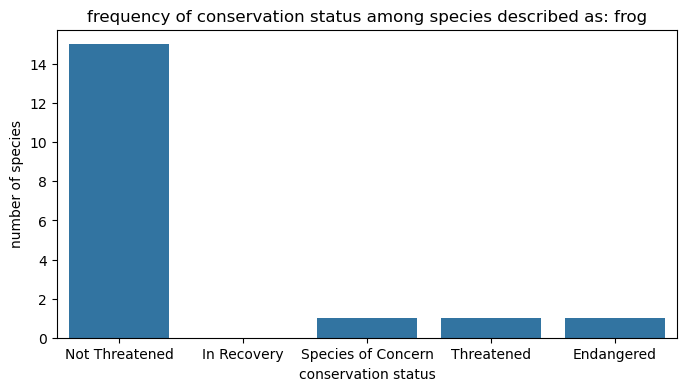

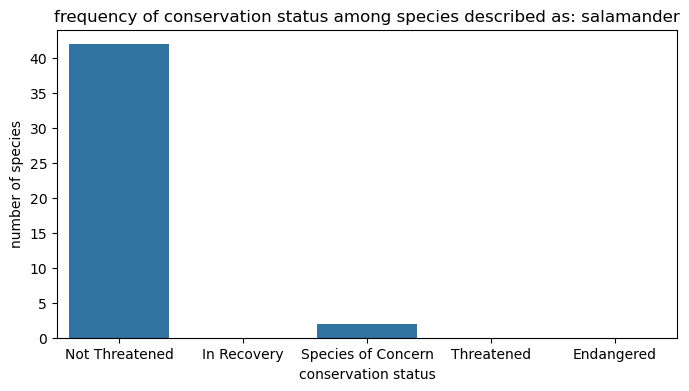

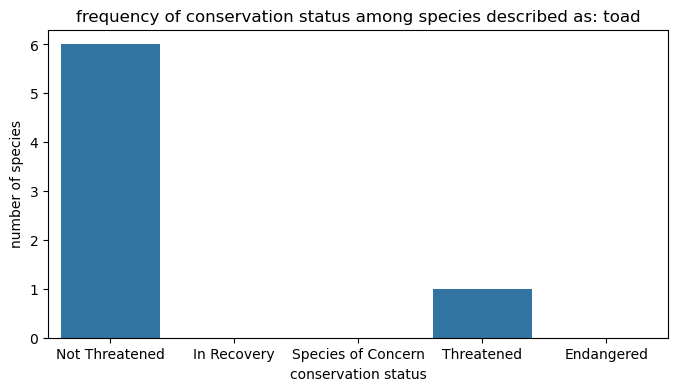

In [63]:
amphibian_info = species_info[species_info['taxon'] == 'Amphibian']

for word in amphibian_words:
    # create mask, filter dataset
    word_df = amphibian_info[amphibian_info['common_names'].str.contains(word, case=False)]
    # create new figure and ax
    fig, ax = plt.subplots(figsize=(8, 4))
    # countplot of values in conservation status by filtered df
    sns.countplot(
        data=word_df,
        x='conservation_status',
        ax=ax,
        order=[
            'Not Threatened',
            'In Recovery',
            'Species of Concern',
            'Threatened',
            'Endangered',
        ],
    )

    ax.set_xlabel('conservation status')
    ax.set_ylabel('number of species')

    ax.set_title(f'frequency of conservation status among species described as: {word}')

    plt.show()

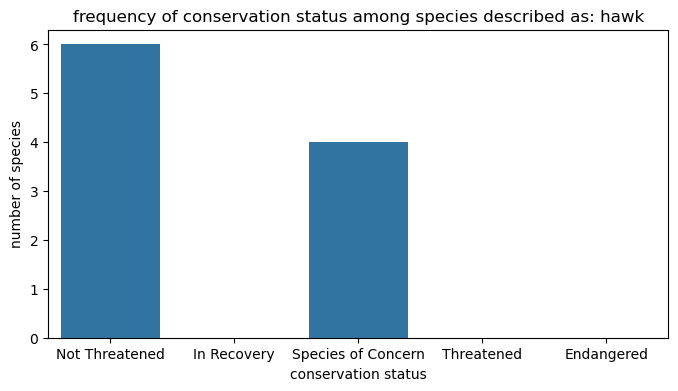

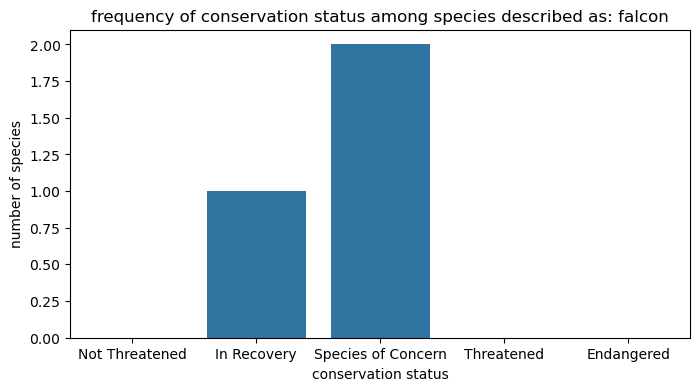

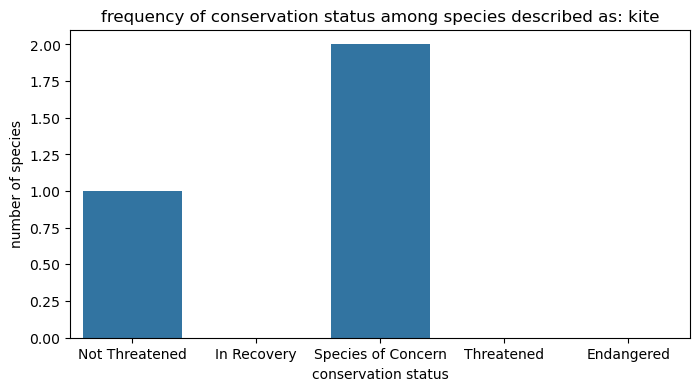

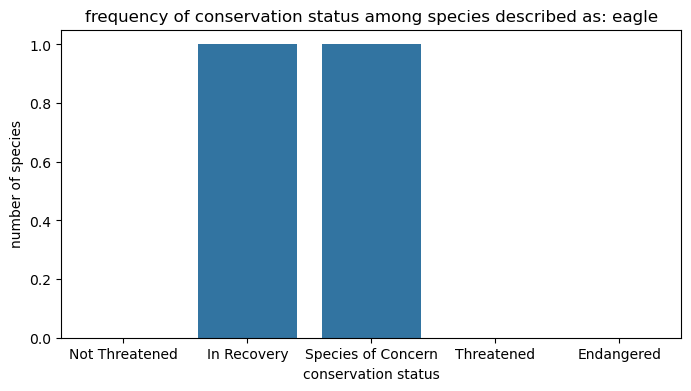

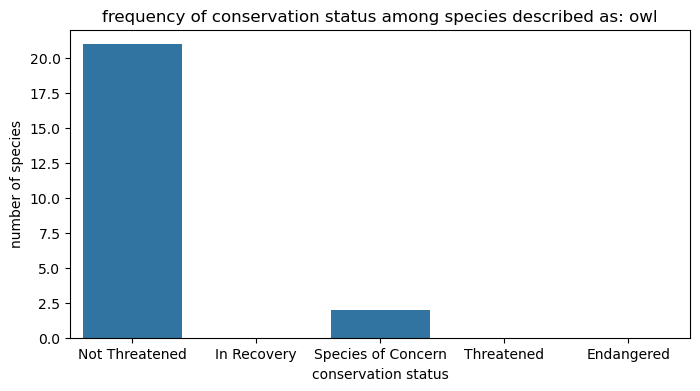

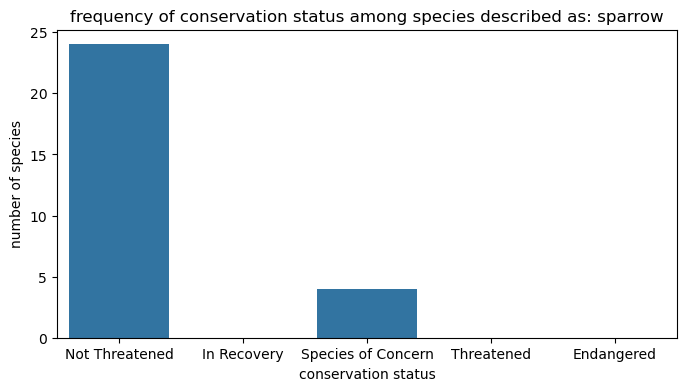

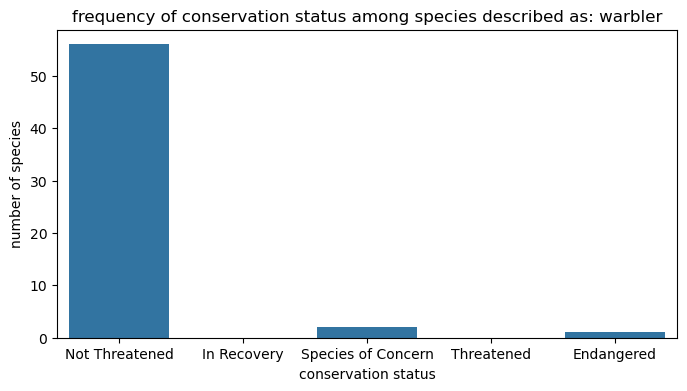

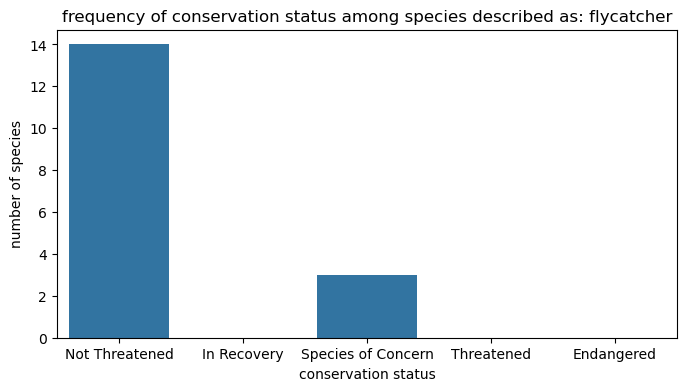

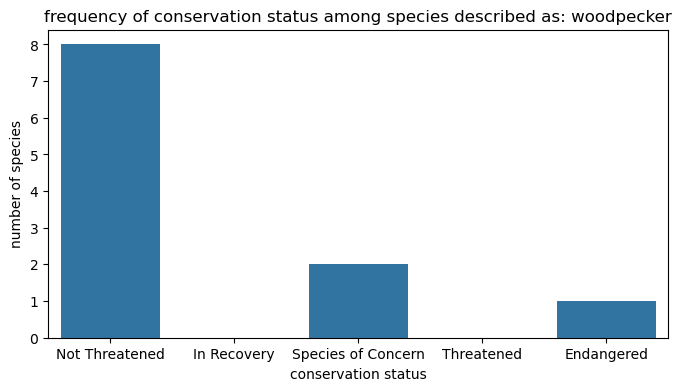

In [64]:
bird_info = species_info[species_info['taxon'] == 'Bird']

for word in birds_words:
    # create mask, filter dataset
    word_df = bird_info[bird_info['common_names'].str.contains(word, case=False)]
    # create new figure and ax
    fig, ax = plt.subplots(figsize=(8, 4))
    # countplot of values in conservation status by filtered df
    sns.countplot(
        data=word_df,
        x='conservation_status',
        ax=ax,
        order=[
            'Not Threatened',
            'In Recovery',
            'Species of Concern',
            'Threatened',
            'Endangered',
        ],
    )

    ax.set_xlabel('conservation status')
    ax.set_ylabel('number of species')

    ax.set_title(f'frequency of conservation status among species described as: {word}')

    plt.show()

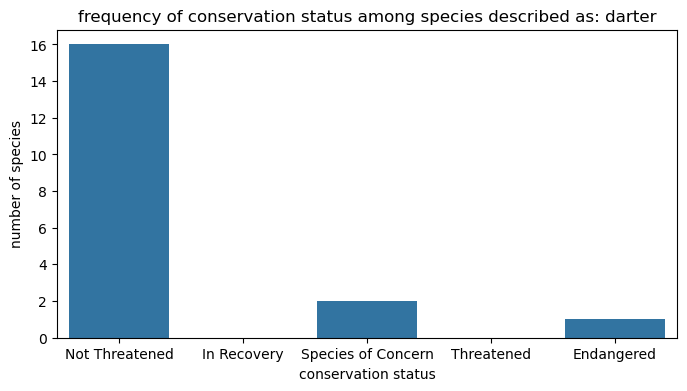

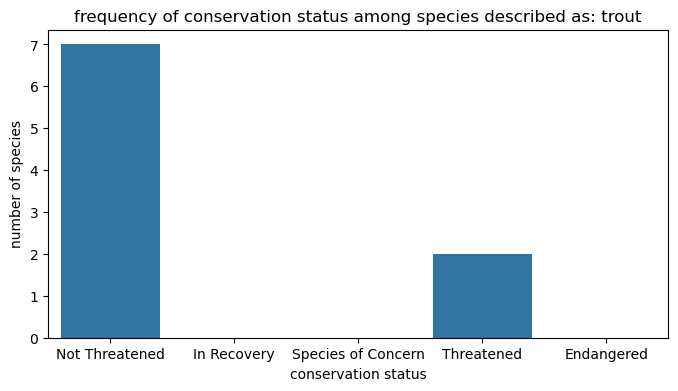

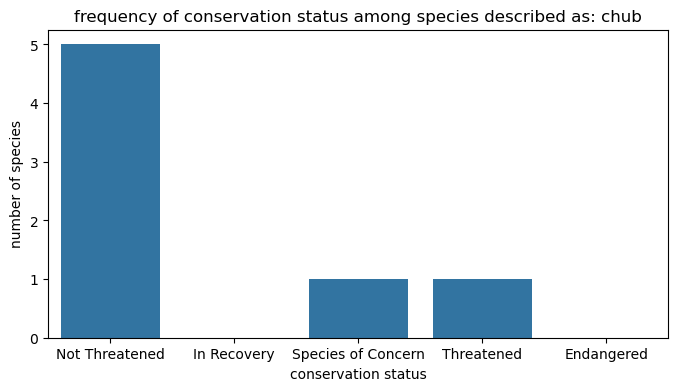

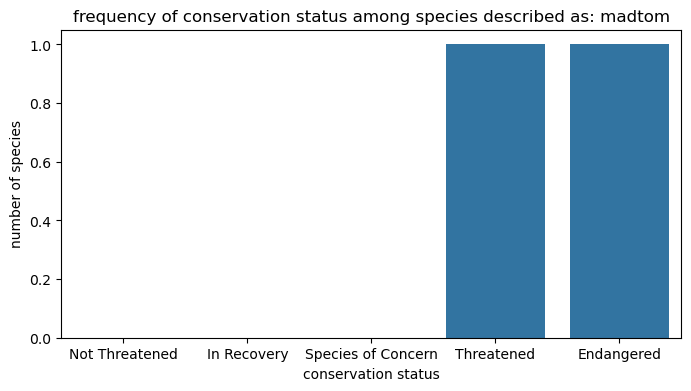

In [65]:
fish_info = species_info[species_info['taxon'] == 'Fish']

for word in fish_words:
    # create mask, filter dataset
    word_df = fish_info[fish_info['common_names'].str.contains(word, case=False)]
    # create new figure and ax
    fig, ax = plt.subplots(figsize=(8, 4))
    # countplot of values in conservation status by filtered df
    sns.countplot(
        data=word_df,
        x='conservation_status',
        ax=ax,
        order=[
            'Not Threatened',
            'In Recovery',
            'Species of Concern',
            'Threatened',
            'Endangered',
        ],
    )

    ax.set_xlabel('conservation status')
    ax.set_ylabel('number of species')

    ax.set_title(f'frequency of conservation status among species described as: {word}')

    plt.show()

In [66]:
# before i plot the mammals i want to do a little digging on a couple of these words. once i looked up the meaning of
# the word myotis and learned they are a type of bat i knew i wanted to check the overlap of myotis and bat in the data

mammal_info = species_info[species_info['taxon'] == 'Mammal']
# make a dataframe for species under each word
myotis_df = mammal_info[mammal_info['common_names'].str.contains('myotis', case=False)]
bat_df = mammal_info[mammal_info['common_names'].str.contains('bat', case=False)]
# inner join - keep rows where all columns are equal in both frames
myotis_bat_df = pd.merge(myotis_df, bat_df, how='inner', on=myotis_df.columns.tolist())
myotis_bat_df.shape

(5, 4)

In [67]:
myotis_df.shape

(13, 4)

In [68]:
bat_df.shape

(18, 4)

In [69]:
myotis_bat_df

,taxon,scientific_name,conservation_status,common_names
0,Mammal,Myotis ciliolabrum,Not Threatened,Myotis Small-Footed Western Bat
1,Mammal,Myotis leibii,Species of Concern,Myotis Small-Footed Eastern Bat
2,Mammal,Myotis lucifugus,Species of Concern,Myotis Little Brown Bat
3,Mammal,Myotis septentrionalis,Threatened,Bat Myotis Northern Long-Eared
4,Mammal,Myotis sodalis,Endangered,Indiana Myotis Social Or Bat


In [70]:
# initial results for a google image search of 'myotis' made it seem like the photographer had a grudge against these
# little creatures but further perusal of the search results indicate that thats just kind of how they look.
# fascinating little things.

# it is clear that myotis are a subset of bat, and i think it is an oversight that 'bat' is not listed as a common
# name for every species that is described using myotis. i want to correct this so that all species with common_names
# containing 'myotis' also contain 'bat'.

# create mask of species_info with 'myotis' AND without 'bat'
myotis_mask = (species_info['taxon'] == 'Mammal') & species_info['common_names'].str.contains('myotis', case=False)
bat_mask = (species_info['taxon'] == 'Mammal') & species_info['common_names'].str.contains('bat', case=False)
combo_mask = myotis_mask & ~bat_mask
# add ' Bat' to the end of every common_names string that contains myotis but not bat
species_info.loc[combo_mask, 'common_names'] += ' Bat'
# and confirm it worked
test_df = species_info[(species_info['taxon'] == 'Mammal') & (species_info['common_names'].str.contains('bat', case=False))]
test_df.shape

(26, 4)

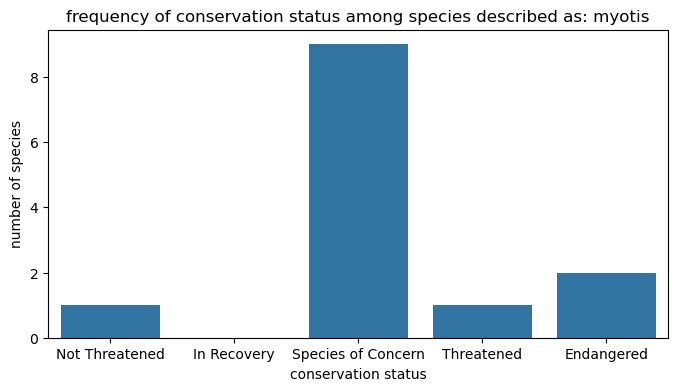

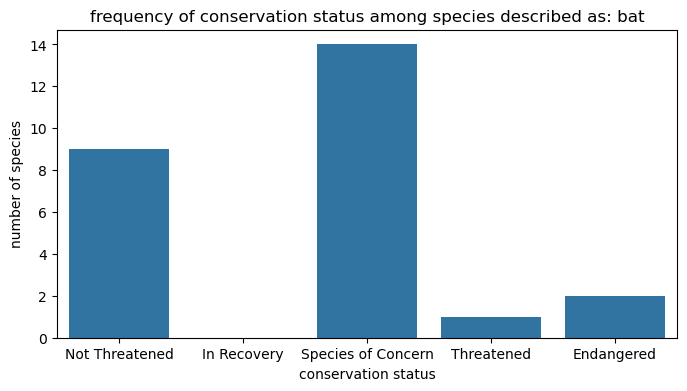

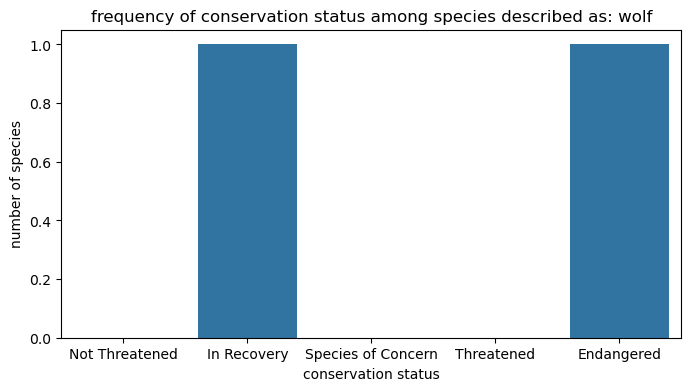

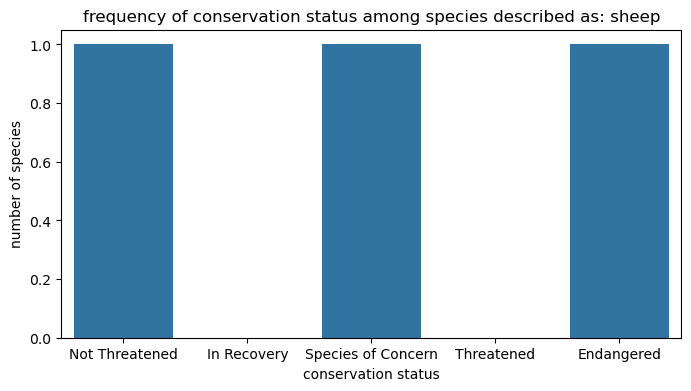

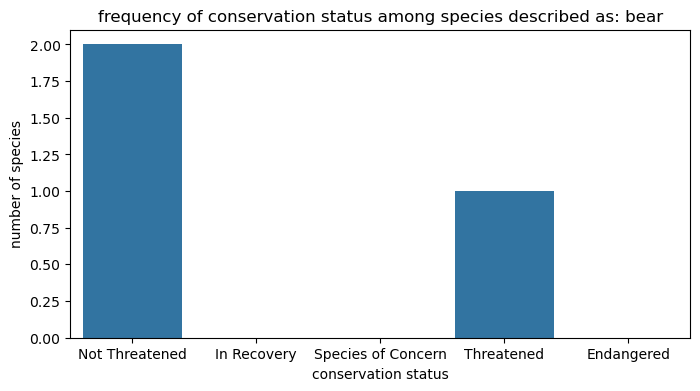

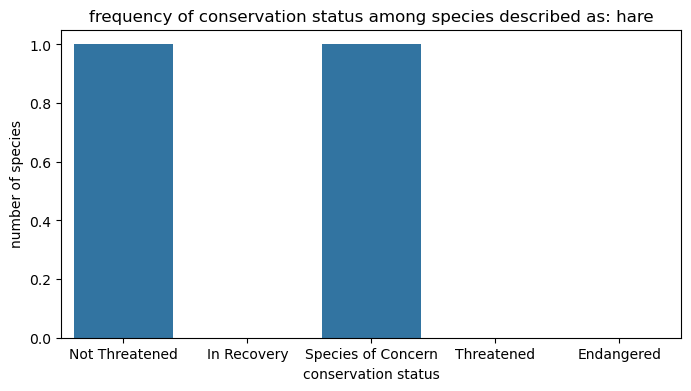

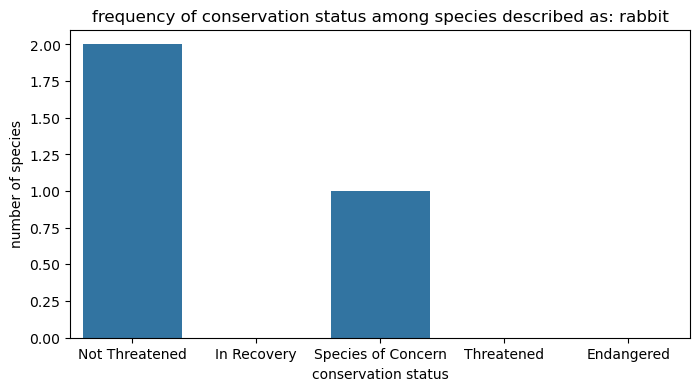

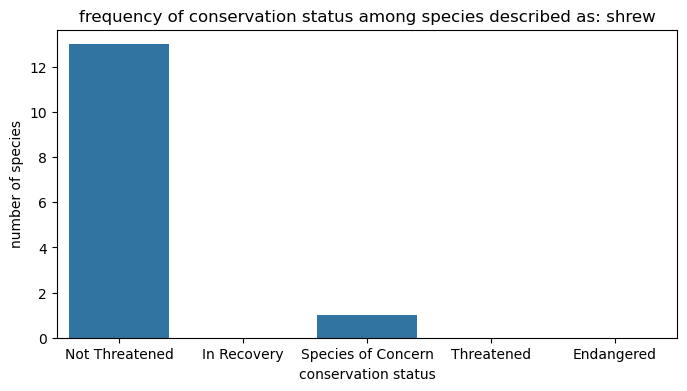

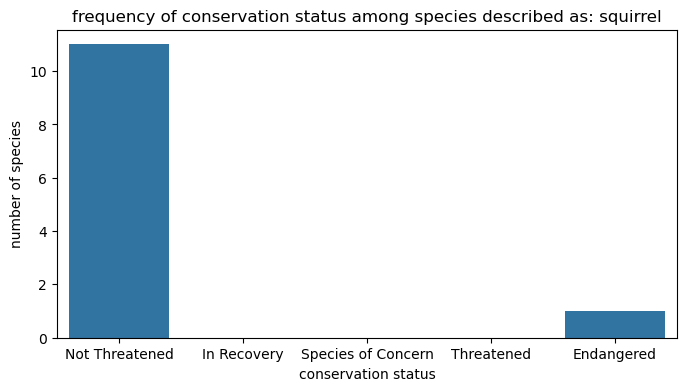

In [71]:
# now that ive addressed that lets redefine mammal_info to make sure it includes the updated common_names values
mammal_info = species_info[species_info['taxon'] == 'Mammal']

for word in mammal_words:
    # create mask, filter dataset
    word_df = mammal_info[mammal_info['common_names'].str.contains(word, case=False)]
    # create new figure and ax
    fig, ax = plt.subplots(figsize=(8, 4))
    # countplot of values in conservation status by filtered df
    sns.countplot(
        data=word_df,
        x='conservation_status',
        ax=ax,
        order=[
            'Not Threatened',
            'In Recovery',
            'Species of Concern',
            'Threatened',
            'Endangered',
        ],
    )

    ax.set_xlabel('conservation status')
    ax.set_ylabel('number of species')

    ax.set_title(f'frequency of conservation status among species described as: {word}')

    plt.show()

In [72]:
# before i move on from mammals i would like to check on 'sheep' as i do not know if it is in reference to actual sheep
# or the word is being used to imply a likeness to sheep
sheep_info = species_info[species_info['common_names'].str.contains('sheep', case=False)]
sheep_info.head()
# ok so as a general note i should filter by taxa before doing any charting to avoid including drastically unrelated species

,taxon,scientific_name,conservation_status,common_names
794,Mammal,Ovis aries,Not Threatened,Feral Sheep Domestic Red Mouflon
795,Mammal,Ovis canadensis,Species of Concern,Bighorn Sheep
796,Mammal,Ovis canadensis sierrae,Endangered,Sierra Bighorn Nevada Sheep
2001,Vascular Plant,Carex illota,Not Threatened,Sedge Smallhead Sheep
2926,Vascular Plant,Festuca filiformis,Not Threatened,Fineleaf Fescue Sheep


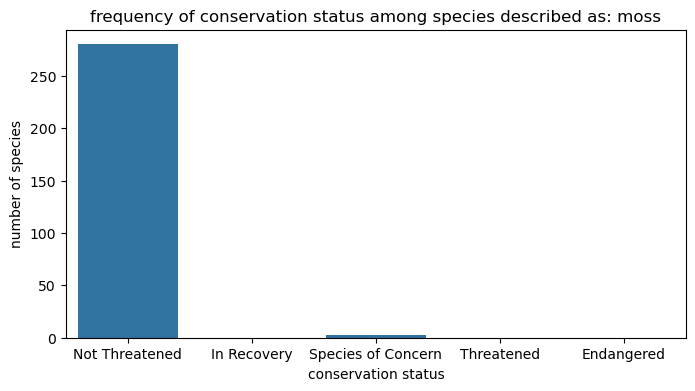

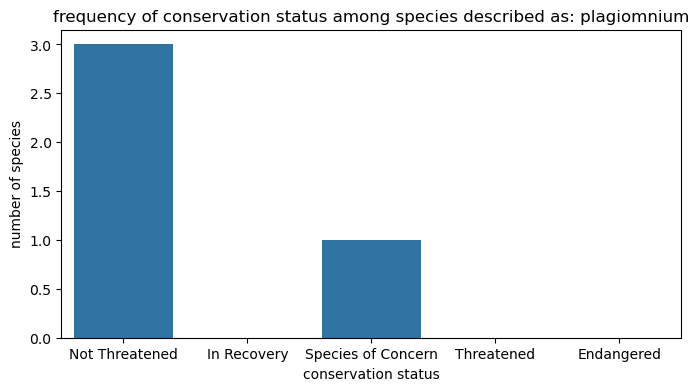

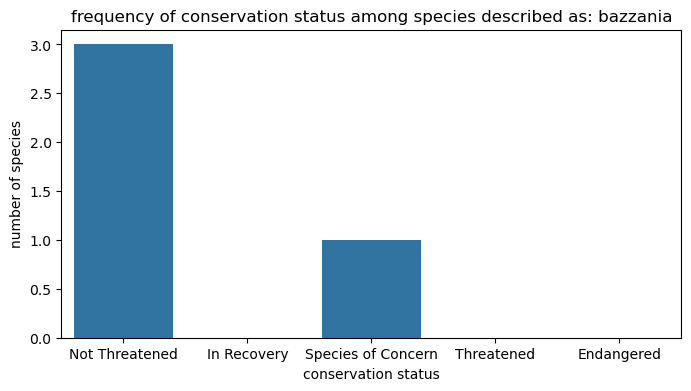

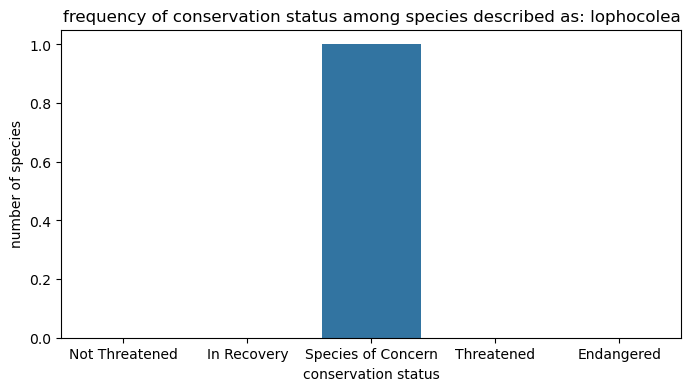

In [73]:
nonvascular_plant_info = species_info[species_info['taxon'] == 'Nonvascular Plant']

for word in nonvascular_plant_words:
    # create mask, filter dataset
    word_df = nonvascular_plant_info[nonvascular_plant_info['common_names'].str.contains(word, case=False)]
    # create new figure and ax
    fig, ax = plt.subplots(figsize=(8, 4))
    # countplot of values in conservation status by filtered df
    sns.countplot(
        data=word_df,
        x='conservation_status',
        ax=ax,
        order=[
            'Not Threatened',
            'In Recovery',
            'Species of Concern',
            'Threatened',
            'Endangered',
        ],
    )

    ax.set_xlabel('conservation status')
    ax.set_ylabel('number of species')

    ax.set_title(f'frequency of conservation status among species described as: {word}')

    plt.show()

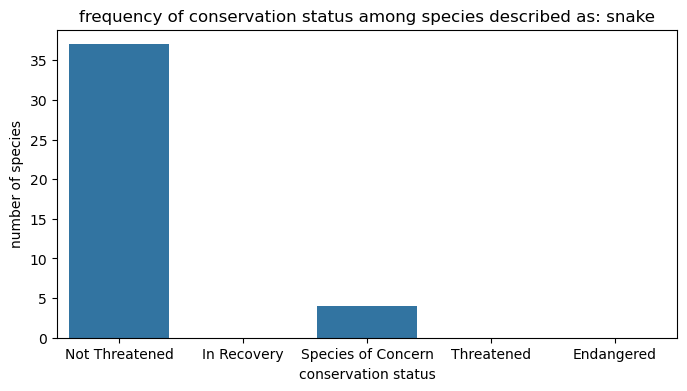

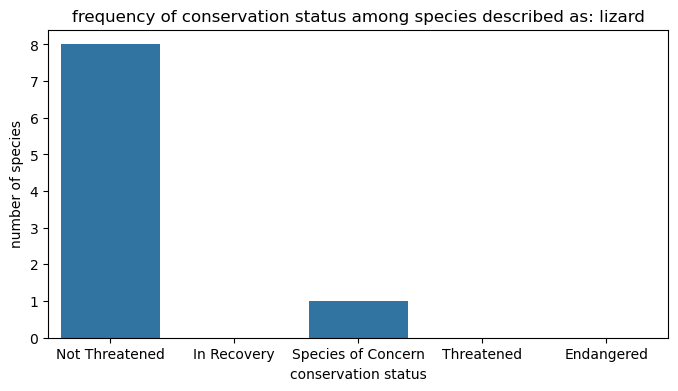

In [74]:
reptile_info = species_info[species_info['taxon'] == 'Reptile']

for word in reptile_words:
    # create mask, filter dataset
    word_df = reptile_info[reptile_info['common_names'].str.contains(word, case=False)]
    # create new figure and ax
    fig, ax = plt.subplots(figsize=(8, 4))
    # countplot of values in conservation status by filtered df
    sns.countplot(
        data=word_df,
        x='conservation_status',
        ax=ax,
        order=[
            'Not Threatened',
            'In Recovery',
            'Species of Concern',
            'Threatened',
            'Endangered',
        ],
    )

    ax.set_xlabel('conservation status')
    ax.set_ylabel('number of species')

    ax.set_title(f'frequency of conservation status among species described as: {word}')

    plt.show()

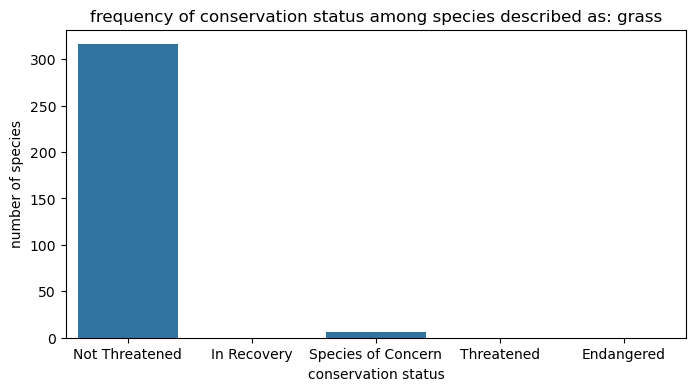

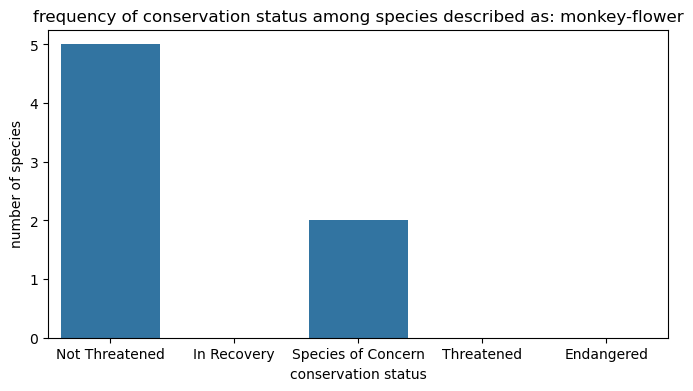

In [75]:
vascular_plant_info = species_info[species_info['taxon'] == 'Vascular Plant']

for word in vascular_plant_words:
    # create mask, filter dataset
    word_df = vascular_plant_info[vascular_plant_info['common_names'].str.contains(word, case=False)]
    # create new figure and ax
    fig, ax = plt.subplots(figsize=(8, 4))
    # countplot of values in conservation status by filtered df
    sns.countplot(
        data=word_df,
        x='conservation_status',
        ax=ax,
        order=[
            'Not Threatened',
            'In Recovery',
            'Species of Concern',
            'Threatened',
            'Endangered',
        ],
    )

    ax.set_xlabel('conservation status')
    ax.set_ylabel('number of species')

    ax.set_title(f'frequency of conservation status among species described as: {word}')

    plt.show()

In [76]:
# i know this is a ton of charts to throw out there all at once, but this is mostly to help me get an
# idea of what types of life to examine in the greater context of population sizes by national park

In [77]:
# alrighty, so at this point i have cleaned my cleaned dataframes and taken a look at the conservation statuses
# of species grouped by search terms that i have collected from the data. there are a few search terms i would
# like to explore further, namely:

terms_to_explore = [
    'frog',         # most interesting term from amphibian
    'hawk',         # most interesting terms from bird
    'falcon',
    'sparrow',
    'myotis',       # most interesting terms from mammal
    'bat',
    'wolf',
    'sheep',
]

# it is time to combine the dataframes and begin exploring the relationships between the data.

# keeping new dataframe name simple, taking a copy of the data in each row of species_info and appending to
# each row of observations where scientific_name overlaps
df = pd.merge(observations, species_info, on='scientific_name', how='left')

In [78]:
df.columns

Index(['scientific_name', 'park_name', 'observations', 'taxon',
       'conservation_status', 'common_names'],
      dtype='object')

In [79]:
# renaming columns
df.columns = ['species', 'national_park', 'num_observed', 'taxon', 'conservation_status', 'common_names']

In [80]:
# reordering columns for my own benefit
reordered_columns = [
    'national_park',
    'taxon',
    'species',
    'conservation_status',
    'num_observed',
    'common_names',
]

df = df[reordered_columns]

In [81]:
df['national_park'].unique()
# i think ill remove the 'national park' from each of these because i know i will get annoyed by it when charting later on

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

In [82]:
# replacing long string with short string, column identifies them as national parks
park_names = {
    'Great Smoky Mountains National Park': 'Great Smoky Mountains',
    'Yosemite National Park': 'Yosemite',
    'Bryce National Park': 'Bryce',
    'Yellowstone National Park': 'Yellowstone',
}

df['national_park'] = df['national_park'].replace(park_names)

In [83]:
# i want to take a look at each park by frequency of values in conservation_status
park_list = df['national_park'].unique().tolist()

for park in park_list:
    park_df = df[df['national_park'] == park]
    print(park + ' National Park')
    print(park_df['conservation_status'].value_counts())

Great Smoky Mountains National Park
conservation_status
Not Threatened        5626
Species of Concern     161
Endangered              14
Threatened              11
In Recovery              6
Name: count, dtype: int64
Yosemite National Park
conservation_status
Not Threatened        5629
Species of Concern     161
Endangered              14
Threatened              11
In Recovery              6
Name: count, dtype: int64
Bryce National Park
conservation_status
Not Threatened        5631
Species of Concern     161
Endangered              14
Threatened              11
In Recovery              6
Name: count, dtype: int64
Yellowstone National Park
conservation_status
Not Threatened        5627
Species of Concern     161
Endangered              14
Threatened              11
In Recovery              6
Name: count, dtype: int64


In [84]:
# i'll be really honest here, i expected completely different results from the above cell. i genuinely thought there would be significantly
# less overlap in the species present in each national park, and thus greater differences between the numbers for each conservation_status
# value printed for each park. i want to confirm that this is the case before proceeding, but this either means that the data provided to me
# by codecademy has been modified/reduced to only really cover the overlapping species that inhabit these national parks, or that the observation
# and location data have been fabricated by codecademy for the purposes of this project and might not represent actual figures. There are other
# possible explanations, but ultimately i just need to be wary of making assumptions and confirm what is actually in the data.

# so lets see how many unique species there are for each national park in this dataset
park_list = df['national_park'].unique().tolist()

for park in park_list:
    park_df = df[df['national_park'] == park]
    print(park + ' National Park')
    print(park_df['species'].nunique())

Great Smoky Mountains National Park
5541
Yosemite National Park
5541
Bryce National Park
5541
Yellowstone National Park
5541


In [85]:
# these results tell me it is either a huge coincidence that all four of the national parks in this dataset have exactly the same species present in each

# OR, and more likely:

# that the data assigned for this project represents a slice of a greater dataset.

# since no context for the data was supplied we have no way to determine how this data fits into a larger context. initially i wanted to compare frequency
# of conservation_status across taxa, but i now see that this information would only be helpful with greater context, as we know with near certainty
# that this dataset is heavily modified/a curated subset with no explanation of how it was curated or modified.

In [86]:
# something extra funky is going on here, not only are the unique species per national park identical, this number is also universally lower
# than the sum of the value counts for conservation status for each of the national parks. this tells me that there are some species per
# park that have multiple listed observations, so i want to confirm that there are multiple observations for unique species recorded for
# each national park
park_list = df['national_park'].unique().tolist()

# create temp frame for each park, print value counts for each species for each temp frame
for park in park_list:
    park_df = df[df['national_park'] == park]
    print('\n' + park + ' National Park')
    print(park_df['species'].value_counts())


Great Smoky Mountains National Park
species
Holcus lanatus           3
Columba livia            3
Procyon lotor            3
Canis lupus              3
Streptopelia decaocto    3
                        ..
Robinia viscosa          1
Ochrotomys nuttalli      1
Achnatherum lemmonii     1
Polygonum cuspidatum     1
Amaranthus hybridus      1
Name: count, Length: 5541, dtype: int64

Yosemite National Park
species
Holcus lanatus                       3
Hypochaeris radicata                 3
Castor canadensis                    3
Puma concolor                        3
Columba livia                        3
                                    ..
Jeffersonia diphylla                 1
Gayophytum diffusum ssp. diffusum    1
Melanthium parviflorum               1
Isoetes occidentalis                 1
Cucurbita pepo                       1
Name: count, Length: 5541, dtype: int64

Bryce National Park
species
Streptopelia decaocto                      3
Holcus lanatus                             

In [87]:
# alright so now i know that there are multiple observations for unique species at each national park, lets take a look at these and see how
# they should be handled. i already know from the difference between unique species and the sum of all conservation statuses by national park
# that i will need to automate this, that i wont be able to just remove one or two observations before moving forward.

# creating frame of only multi-observed species
df_multiple_obs = df.groupby(['national_park', 'species']).filter(lambda x: len(x) > 1)

# for name, group in df_multiple_obs.groupby(['national_park', 'species']):      # commenting this out because it prints everything and that is too much. edited version below
#     print(f"\nDuplicate observations for {name[1]} in {name[0]}:")
#     print(group[['num_observed', 'conservation_status']])

print_counter = 15
for name, group in df_multiple_obs.groupby(['national_park', 'species']):
    if print_counter >= 1:
        print(f"\nDuplicate observations for {name[1]} in {name[0]}:")
        print(group[['num_observed', 'conservation_status']])
        print_counter -= 1


Duplicate observations for Agrostis capillaris in Bryce:
      num_observed conservation_status
3993           103      Not Threatened
4864           105      Not Threatened

Duplicate observations for Agrostis gigantea in Bryce:
      num_observed conservation_status
6824           104      Not Threatened
8675           116      Not Threatened

Duplicate observations for Agrostis mertensii in Bryce:
       num_observed conservation_status
3199             74      Not Threatened
18304            88      Not Threatened

Duplicate observations for Agrostis scabra in Bryce:
       num_observed conservation_status
17985            60      Not Threatened
23244           118      Not Threatened

Duplicate observations for Agrostis stolonifera in Bryce:
       num_observed conservation_status
719             101      Not Threatened
22556            81      Not Threatened

Duplicate observations for Agrostis variabilis in Bryce:
       num_observed conservation_status
13182            93     

In [88]:
# there are multiple, either two or three, observations recorded for a variety of species at each national park. i have no way
# to determine if multiple observations of the same species at the same park are intended to be additive or if subsequent (order
# determined by index) observations are intended to replace any prior observations.

# since i have no way to determine this, i will have to choose a method to handle these duplicates and stick with it.

# i will be keeping only the most recent (largest index) observation of each species for each national park based on the
# reasoning/assumption that num_observed is already the result of a number of separate observations being summed together,
# so it would be a reasonable to interpret any re-recording of a sum for a species as a replacement for the prior recording.

idx_to_keep = df.groupby(['national_park', 'species']).apply(lambda x: x.index.max(), include_groups=False)
df = df.loc[idx_to_keep]

In [89]:
park_list = df['national_park'].unique().tolist()

for park in park_list:
    park_df = df[df.national_park == park]
    print('\n' + park + ' National Park')
    print(park_df.species.value_counts())


Bryce National Park
species
Abies bifolia                          1
Phegopteris connectilis                1
Philadelphus hirsutus                  1
Pheucticus melanocephalus              1
Pheucticus ludovicianus                1
                                      ..
Empidonax wrightii                     1
Empidonax virescens                    1
Empidonax traillii                     1
Empidonax occidentalis                 1
Zygodon viridissimus var. rupestris    1
Name: count, Length: 5541, dtype: int64

Great Smoky Mountains National Park
species
Abies bifolia                          1
Phegopteris connectilis                1
Philadelphus hirsutus                  1
Pheucticus melanocephalus              1
Pheucticus ludovicianus                1
                                      ..
Empidonax wrightii                     1
Empidonax virescens                    1
Empidonax traillii                     1
Empidonax occidentalis                 1
Zygodon viridissimus var.

In [90]:
# checking to see if dupes have been handled with same code as before
df_multiple_obs = df.groupby(['national_park', 'species']).filter(lambda x: len(x) > 1)
df_multiple_obs.describe()

,num_observed
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [91]:
# now that things are looking better im resetting the index
df.reset_index(drop=True, inplace=True)

In [92]:
# my plan for analyzing this data has gotten derailed a bit as i discover more weird things about this data, but my
# intention is still to compare the distribution of species, both at risk and otherwise, across these different national
# parks.

# while checking for duplicate observations in each park i learned that this dataset contains observations of 5541
# unique species across four different locations. all four locations have an observed population size for each of these
# 5541 unique species.

# due to the lack of information regarding the method and scope of data collection we cannot know that the data collected
# at each park (the sample) represents the same proportion/percentage of the estimated total population. in an ideal world we
# would know how the data was collected and that each park's dataset was intended to represent the same percentage of the park's
# species' populations, but we do not have that.

# moving forward i will be operating under the assumption that this data is supposed to represent similar sized cross-sections of
# different national parks so that species' numbers can be directly compared to one another.
# -                     -                     -                     -                     -                     -                     -
        # i think my only alternative would be to:
        #     - generate a descriptive value for a species' relative prominence among similar and different species
        #         within each national park for each species (at each park)
        #     - compare descriptive values across parks to explore target species relationships with other life
        # i want to try this at least once and see if it yields anything worthwhile

        # i think this will need to be done on a case by case basis, there are too many variables not included in the data
        # (ecological, geographical, meteoroligical, even political, etc.) that cannot be controlled for to build a
        # one-size-fits-all solution.

        # all of these unknown/unrecorded variables can impact the size of a species' population, so i will need to be
        # deliberate/judicious with my creation of these helper features, and only use them to guide my analysis.

print(terms_to_explore)

['frog', 'hawk', 'falcon', 'sparrow', 'myotis', 'bat', 'wolf', 'sheep']


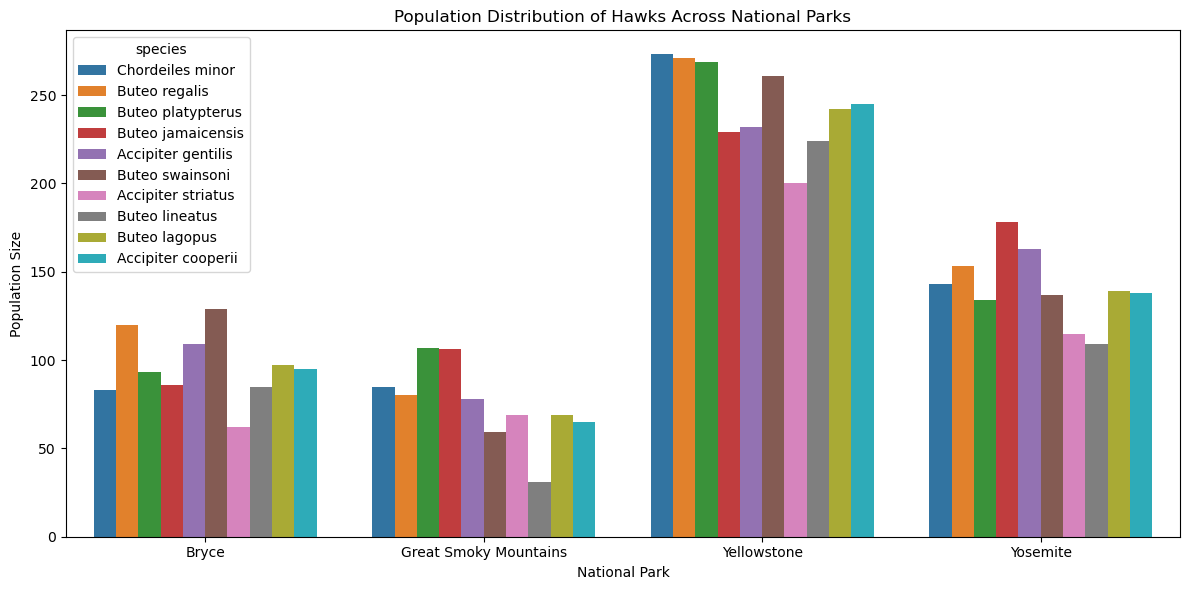

In [93]:
# im going to start with the term 'hawk' because it seems to be a decent middle ground for number of species described by a single word (from the words ive selected)
hawk_df = df[(df['taxon'] == 'Bird') & (df['common_names'].str.contains('hawk', case=False))]
species_order = hawk_df.sort_values('conservation_status')['species'].unique()
plt.figure(figsize = (12, 6))
sns.barplot(
    data = hawk_df,
    x = 'national_park',
    y = 'num_observed',
    hue = 'species',
    hue_order = species_order,
)
plt.xlabel('National Park')
plt.ylabel('Population Size')
plt.title('Population Distribution of Hawks Across National Parks')
plt.tight_layout()
plt.show()

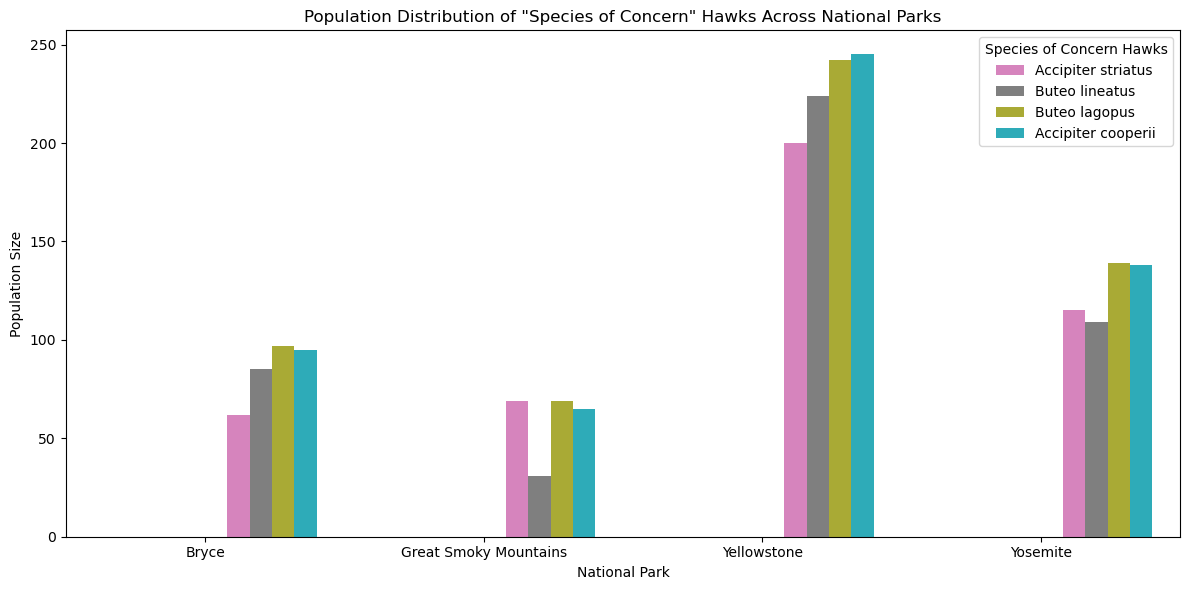

In [94]:
# now i want to look at hawk distribution by park where conservation_status is not no-threat and, in the case of hawks,
# there are 4 species that are 'species_of_concern'
concern_hawk_df = hawk_df[hawk_df['conservation_status'] == 'Species of Concern']

plt.figure(figsize = (12, 6))
# defining ax so i can keep the hues and order the same as above, i dont know why im making this complicated for myself
ax = sns.barplot(
    data = concern_hawk_df,
    x = 'national_park',
    y = 'num_observed',
    hue = 'species',
    hue_order = species_order,
)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[-4:], labels[-4:], title='Species of Concern Hawks')
plt.xlabel('National Park')
plt.ylabel('Population Size')
plt.title('Population Distribution of "Species of Concern" Hawks Across National Parks')
plt.tight_layout()
plt.show()

In [95]:
# now i want to broaden my scope and see if i can collect exclusively birds of prey using the terms i collected from the
# common_names
birds_of_prey = [
    'hawk',
    'falcon',
    'eagle',
    'owl',
    'kite',
]

In [96]:
# i will note here that this is the first time i am exploring the term 'kite' and after looking them up this might be another
# myotis vs bat situation. to speak in metaphor: i want to make sure that if in fact these are rectangles and squares, that the rectangles
# be labled only 'rectangle', while squares be labled both 'square' and 'rectangle'. wikipedia (https://en.wikipedia.org/wiki/Kite_(bird))
# says "Kite is the common name for certain birds of prey in the family Accipitridae" and we have a few 'accipiter' species in this dataset,
# so lets see if kites are hawks

In [97]:
accipiter_df = species_info[species_info['scientific_name'].str.contains('accipiter', case=False)]
accipiter_df.head()

,taxon,scientific_name,conservation_status,common_names
80,Bird,Accipiter cooperii,Species of Concern,Hawk Cooper's
81,Bird,Accipiter gentilis,Not Threatened,Northern Goshawk
82,Bird,Accipiter striatus,Species of Concern,Hawk Sharp-Shinned


In [98]:
kite_df = species_info[species_info['common_names'].str.contains('kite', case=False)]
kite_df.head()

,taxon,scientific_name,conservation_status,common_names
253,Bird,Elanoides forficatus,Species of Concern,Kite Swallow-Tailed American
254,Bird,Elanus leucurus,Species of Concern,White-Tailed Kite
304,Bird,Ictinia mississippiensis,Not Threatened,Kite Mississippi


In [99]:
# it appears we are in the clear, kites will be kites. lets broaden the scope a bit and compare
# competitor populations with the list birds_of_prey. we can collect relative values for population
# size between different birds of prey and compare these values by national park to determine if certain
# parks are more or less favorable to specific categories within birds_of_prey, or even to specific
# species within those categories.

mask = df['common_names'].apply(lambda x: any(word.lower() in x.lower() for word in birds_of_prey))
# creating a copy/new frame and resetting index using .reset_index() so i can safely modify this later
all_birds_of_prey_df = df[(df['taxon'] == 'Bird') & mask].reset_index(drop = True)
all_birds_of_prey_df.describe(include='all')

,national_park,taxon,species,conservation_status,num_observed,common_names
count,164,164,164,164,164.000000,164
unique,4,1,41,3,NaN,40
top,Bryce,Bird,Accipiter cooperii,Not Threatened,NaN,Owl Flammulated
freq,41,164,4,112,NaN,8
mean,NaN,NaN,NaN,NaN,137.621951,NaN
std,NaN,NaN,NaN,NaN,66.233208,NaN
min,NaN,NaN,NaN,NaN,11.000000,NaN
25%,NaN,NaN,NaN,NaN,86.000000,NaN
50%,NaN,NaN,NaN,NaN,119.500000,NaN
75%,NaN,NaN,NaN,NaN,179.250000,NaN


In [100]:
all_birds_of_prey_df.head(41)

,national_park,taxon,species,conservation_status,num_observed,common_names
0,Bryce,Bird,Accipiter cooperii,Species of Concern,95,Hawk Cooper's
1,Bryce,Bird,Accipiter gentilis,Not Threatened,109,Northern Goshawk
2,Bryce,Bird,Accipiter striatus,Species of Concern,62,Hawk Sharp-Shinned
3,Bryce,Bird,Aegolius,Not Threatened,95,Saw-Whet Owls
4,Bryce,Bird,Aegolius acadicus,Not Threatened,131,Saw-Whet Owl Northern
5,Bryce,Bird,Aegolius funereus,Not Threatened,73,Owl Boreal
6,Bryce,Bird,Aquila chrysaetos,Species of Concern,101,Eagle Golden
7,Bryce,Bird,Asio flammeus,Species of Concern,82,Owl Short-Eared
8,Bryce,Bird,Asio otus,Species of Concern,94,Owl Long-Eared
9,Bryce,Bird,Athene cunicularia,Not Threatened,110,Burrowing Owl


In [101]:
# looks like a few not-owls got pulled in, ill have to drop the meadowlarks and the yellowlegs

# ive also noticed that the flammulated owl is listed twice, with two different species names and
# two different num_observed. i looked both species names up and they are the same animal, one of the
# names is just outdated. i would bet this isnt the only instance of this sort of duplication
# but all i can do now is keep an eye out for them. hopefully i will find a pattern i can confirm
# then filter for. for now i will remove Otus, as it is the outdated term

# drop taxa column
all_birds_of_prey_df.drop(columns = ['taxon'], inplace = True)

# filter by species - since there are 4 parks in this dataset, so each species will appear 4 times
to_drop = [
    'Sturnella magna',
    'Sturnella neglecta',
    'Tringa flavipes',
    'Tringa melanoleuca',
    'Otus flammeolus',
]
mask = ~all_birds_of_prey_df['species'].isin(to_drop)
birds_of_prey_df = all_birds_of_prey_df[mask].copy()

birds_of_prey_df.describe(include = 'all')

,national_park,species,conservation_status,num_observed,common_names
count,144,144,144,144.000000,144
unique,4,36,3,NaN,36
top,Bryce,Accipiter cooperii,Not Threatened,NaN,Hawk Cooper's
freq,36,4,92,NaN,4
mean,NaN,NaN,NaN,136.854167,NaN
std,NaN,NaN,NaN,66.597420,NaN
min,NaN,NaN,NaN,11.000000,NaN
25%,NaN,NaN,NaN,86.000000,NaN
50%,NaN,NaN,NaN,116.500000,NaN
75%,NaN,NaN,NaN,179.250000,NaN


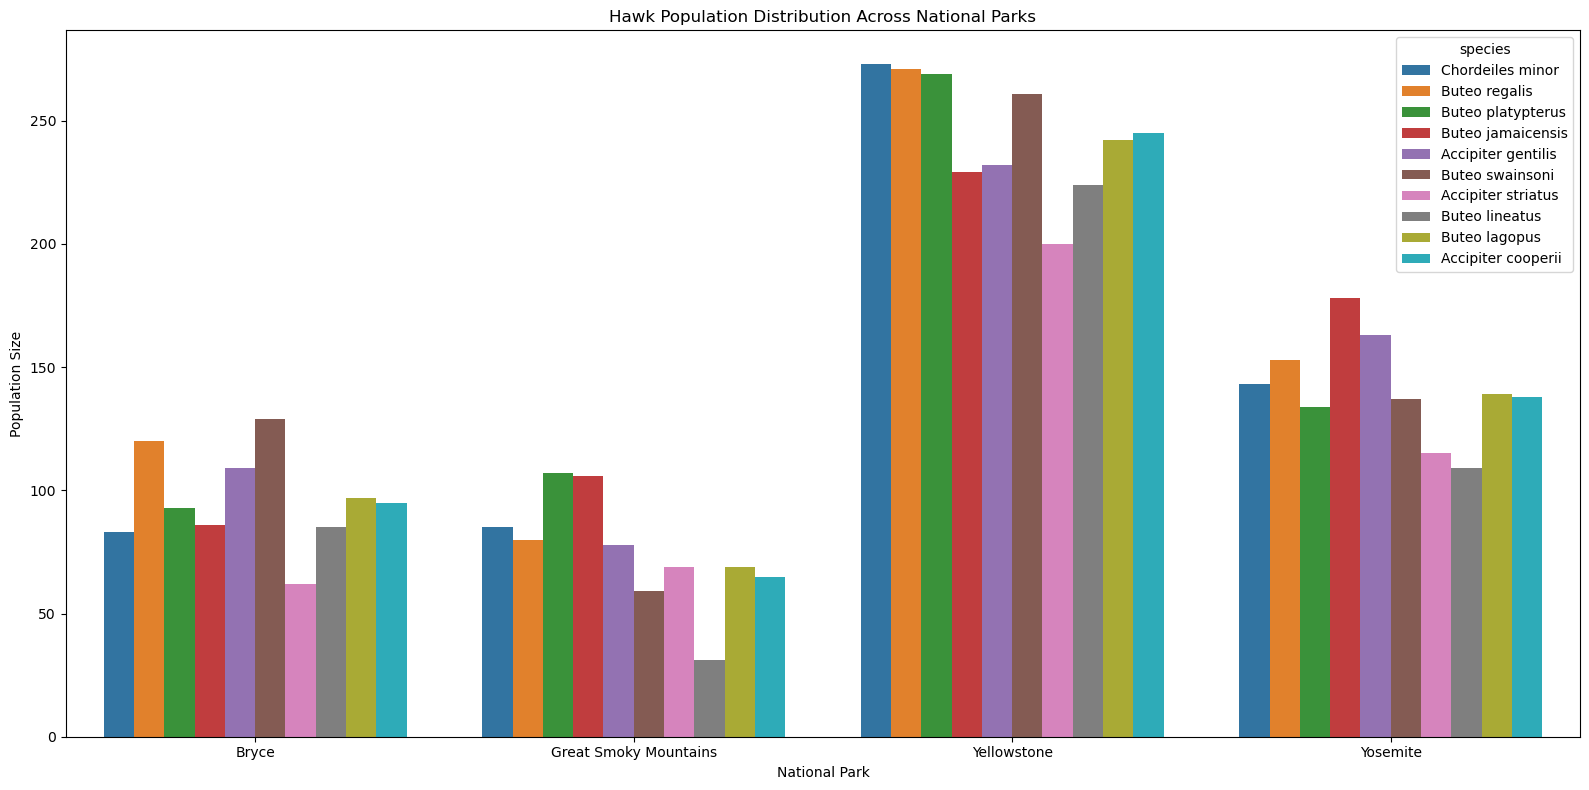

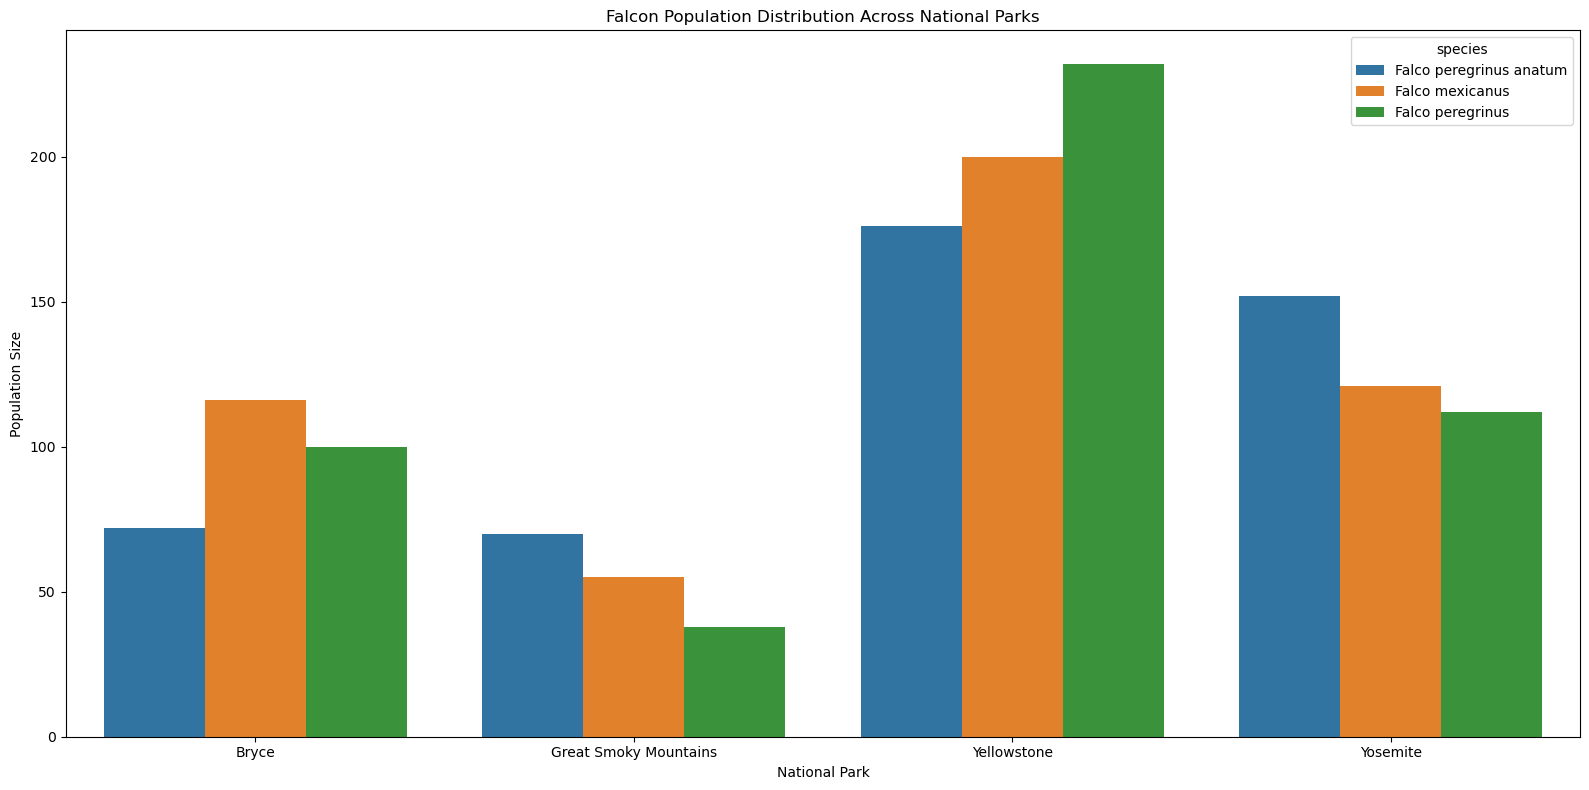

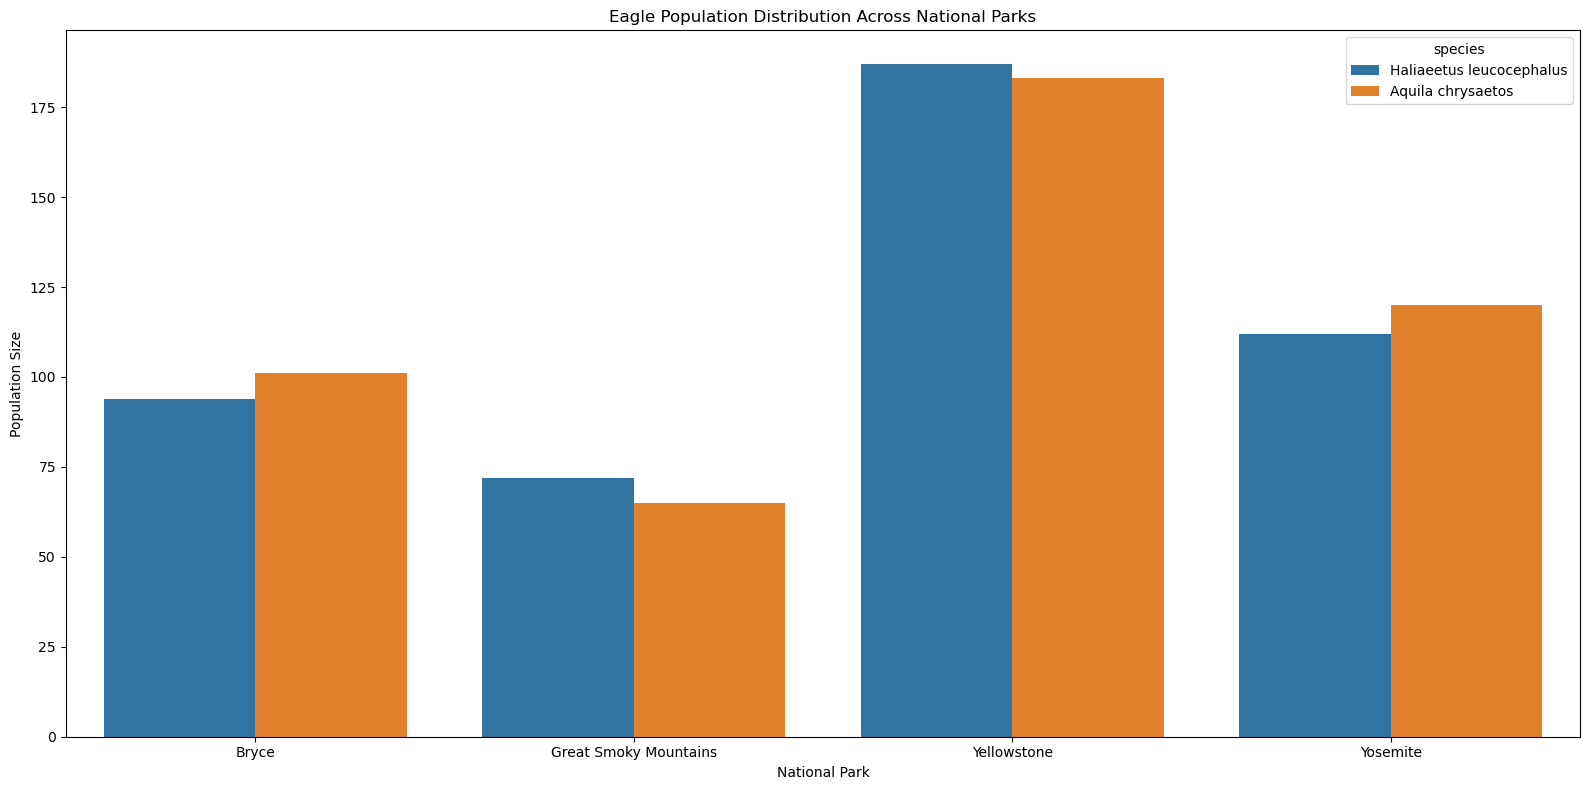

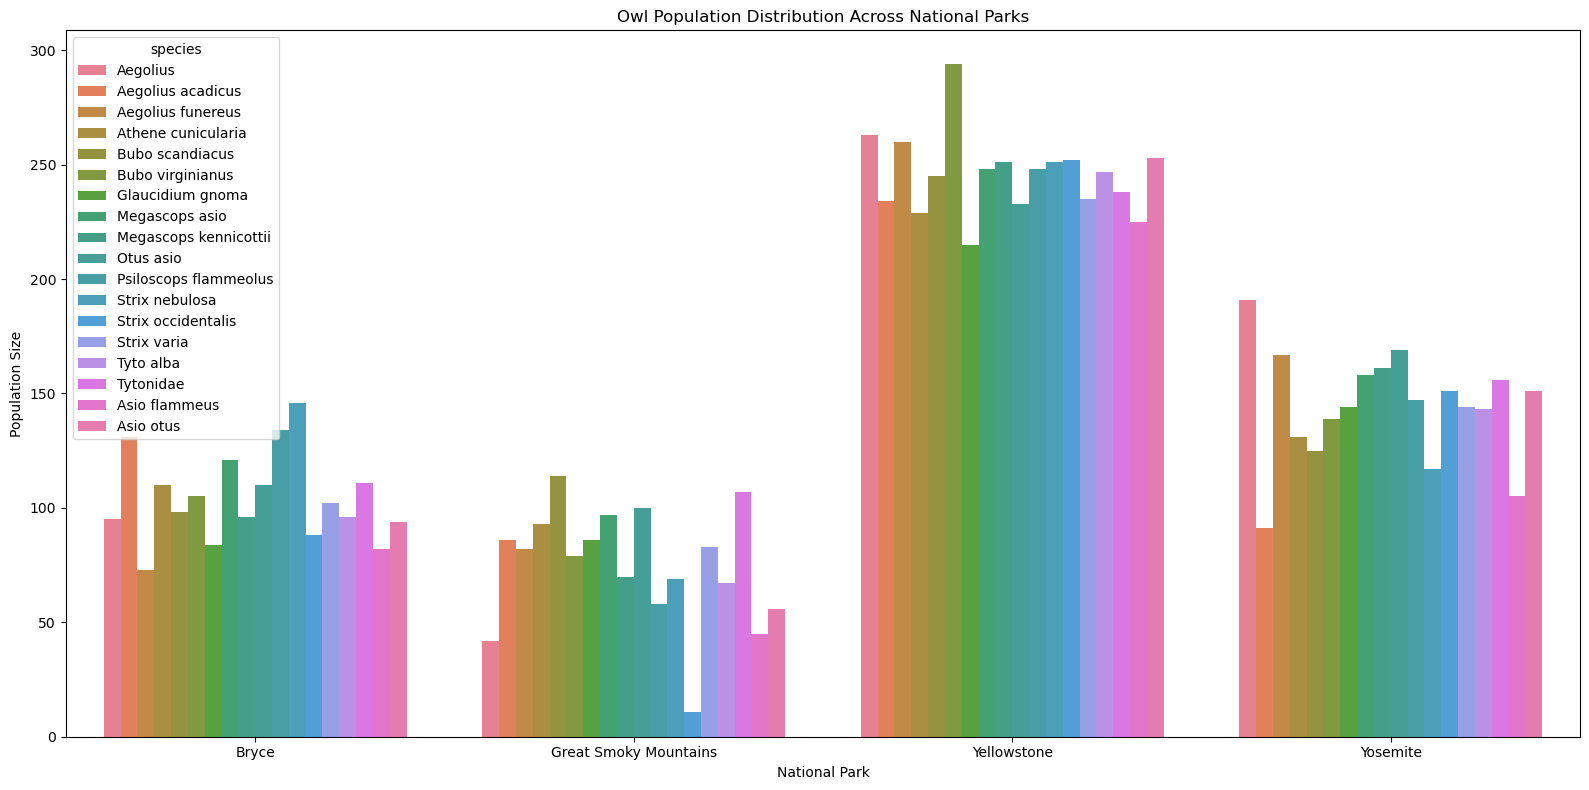

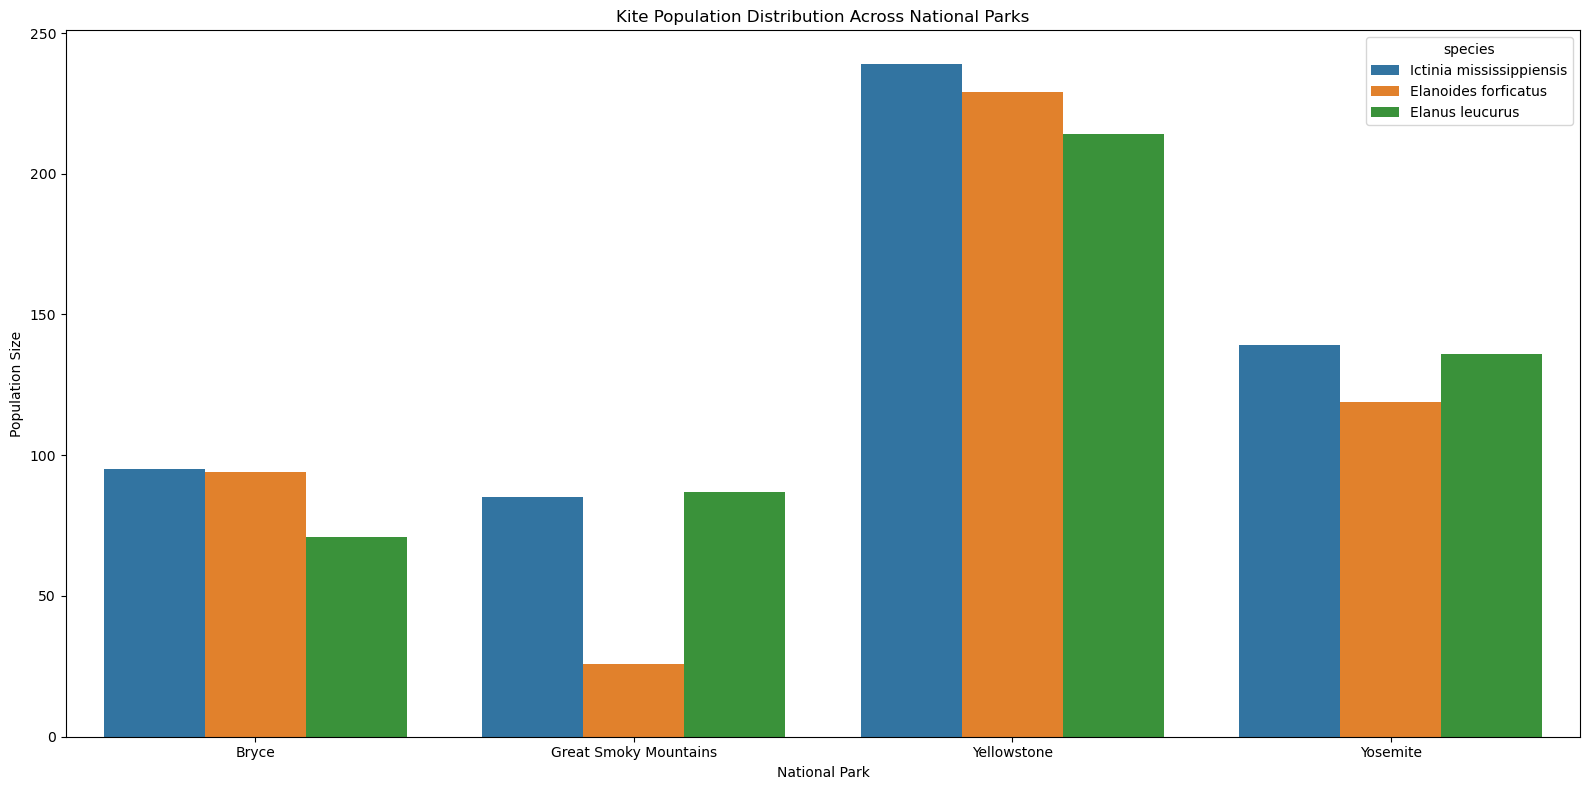

In [102]:
# i want to chart these species in such a way that the bars are ordered left to right from least to most
# at risk regarding conservation_status

for bird in birds_of_prey:
    bird_df = birds_of_prey_df[birds_of_prey_df['common_names'].str.contains(bird, case=False)]
    species_order = bird_df.sort_values('conservation_status')['species'].unique()
    plt.figure(figsize = (16, 8))
    sns.barplot(
        data = bird_df,
        x = 'national_park',
        y = 'num_observed',
        hue = 'species',
        hue_order = species_order,
    )
    plt.xlabel('National Park')
    plt.ylabel('Population Size')
    plt.title(f'{bird.title()} Population Distribution Across National Parks')
    plt.tight_layout()
    plt.show()

In [103]:
# there are a lot of owls in this dataset.
# ok lets get the sum of all birds of prey observations for each national park
park_totals = birds_of_prey_df.groupby('national_park')['num_observed'].sum()
# create a new column containing the result of that row's num_observed divided by that row's national_park birds of prey sum.
birds_of_prey_df['relative_prevalence'] = birds_of_prey_df.apply(
    lambda row: row['num_observed'] / park_totals[row['national_park']],
    axis=1
)
birds_of_prey_df.head()

,national_park,species,conservation_status,num_observed,common_names,relative_prevalence
0,Bryce,Accipiter cooperii,Species of Concern,95,Hawk Cooper's,0.026551
1,Bryce,Accipiter gentilis,Not Threatened,109,Northern Goshawk,0.030464
2,Bryce,Accipiter striatus,Species of Concern,62,Hawk Sharp-Shinned,0.017328
3,Bryce,Aegolius,Not Threatened,95,Saw-Whet Owls,0.026551
4,Bryce,Aegolius acadicus,Not Threatened,131,Saw-Whet Owl Northern,0.036613


In [104]:
# i want to make sure i didnt accidentally capture species outside of the 'Bird' taxon and i want to see what im working with
birds_of_prey_df.describe(include = 'all')

,national_park,species,conservation_status,num_observed,common_names,relative_prevalence
count,144,144,144,144.000000,144,144.000000
unique,4,36,3,NaN,36,NaN
top,Bryce,Accipiter cooperii,Not Threatened,NaN,Hawk Cooper's,NaN
freq,36,4,92,NaN,4,NaN
mean,NaN,NaN,NaN,136.854167,NaN,0.027778
std,NaN,NaN,NaN,66.597420,NaN,0.005851
min,NaN,NaN,NaN,11.000000,NaN,0.004244
25%,NaN,NaN,NaN,86.000000,NaN,0.025045
50%,NaN,NaN,NaN,116.500000,NaN,0.027652
75%,NaN,NaN,NaN,179.250000,NaN,0.030768


In [105]:
# i want to see if there is a trend overall among birds of prey across parks
correlation_matrix = birds_of_prey_df.pivot(index='species', columns='national_park', values='relative_prevalence').corr()
print(correlation_matrix)

national_park             Bryce  Great Smoky Mountains  Yellowstone  Yosemite
national_park                                                                
Bryce                  1.000000               0.090963     0.295929 -0.088722
Great Smoky Mountains  0.090963               1.000000     0.087596  0.231046
Yellowstone            0.295929               0.087596     1.000000  0.347095
Yosemite              -0.088722               0.231046     0.347095  1.000000


In [106]:
# this tells me that each national park has a pretty distinct spread of birds of prey.

# lets look specifically at species under 'hawk' and see if im chasing ghosts/tilting at windmills
just_hawks = birds_of_prey_df[birds_of_prey_df['common_names'].str.contains('hawk', case=False)]
correlation_matrix = just_hawks.pivot(index='species', columns='national_park', values='relative_prevalence').corr()
print(correlation_matrix)

national_park             Bryce  Great Smoky Mountains  Yellowstone  Yosemite
national_park                                                                
Bryce                  1.000000              -0.054657     0.587474  0.364254
Great Smoky Mountains -0.054657               1.000000     0.331406  0.665448
Yellowstone            0.587474               0.331406     1.000000  0.249640
Yosemite               0.364254               0.665448     0.249640  1.000000


In [107]:
# Bryce/Great Smoky Mountain National Parks appear to have the greatest difference between relative distribution of hawks

# Great Smoky Mountains/Yosemite share the greatest similarity in relative distribution of hawks followed by Yellowstone/Bryce.


# the next step i *could* take here would be to compare the populations of birds_of_prey with the populations of the prey
# of the species listed in birds_of_prey to see if there is a relationship between the corresponding populations across parks.

# courtesy of wikipedia and the encyclopedia brittanica: hawks (and other birds of prey) prey on small mammals, reptiles, and
# insects. i have compiled a list of terms from amphibian_words_df, mammal_words_df, and reptile_words_df that represent my
# best effort to recreate the typical diet of species described as 'hawk' with the lifeforms available in this dataset. i do
# not have access to insect information, and im sure there are many species not contained in this dataset that regularly fall
# prey to a 'hawk' or other bird of prey, but this sort of exploration would be limited by this dataset.
prey_of_birds_of_prey = [
    'mouse',
    'shrew',
    'squirrel',
    'chipmunk',
    'vole',
    'rat',
    'mole',
    'weasel',
    'skunk',
    'gopher',
    'rabbit',
    'salamander',
    'frog',
    'toad',
    'snake',
    'lizard',
    'skink',
]
# i will save this for another time or a more comprehensive dataset.

In [108]:
# my curiosity was piqued when i was poking around the mammal words earlier so the last thing i
# want to look at is distribution of bat (and myotis) populations across the four national parks.

# bat frame
bat_df = df[(df['taxon'] == 'Mammal') & (df['common_names'].str.contains('bat', case=False))].copy()

In [109]:
# now i want to add a relative prevalence column similar to the one i made for birds of prey
park_totals = bat_df.groupby('national_park')['num_observed'].sum()
# create a new column containing the result of that row's num_observed divided by that row's national_park bat sum.
bat_df['relative_prevalence'] = bat_df.apply(
    lambda row: row['num_observed'] / park_totals[row['national_park']],
    axis=1
)
# now all bats in this df have a feature describing their population size relative to *all bats* at each park. this
# will be helpful for comparing all bats at once, but i think i want to be able to compare this range of bat species
# in three ways, 1 - all bats, 2 - myotis, and 3 - non-myotis

In [110]:
# mask for myotis
myotis_mask = bat_df['common_names'].str.contains('myotis', case=False)
# myotis frame
myotis_df = bat_df[myotis_mask].copy()
# non-myotis frame using the same mask but inverted
non_myotis_df = bat_df[~myotis_mask].copy()

In [111]:
myotis_park_totals = myotis_df.groupby('national_park')['num_observed'].sum()
# create a new column containing the result of that row's num_observed divided by that row's national_park bat sum.
myotis_df['myotis_relative_prevalence'] = myotis_df.apply(
    lambda row: row['num_observed'] / park_totals[row['national_park']],
    axis=1
)

In [112]:
non_myotis_park_totals = non_myotis_df.groupby('national_park')['num_observed'].sum()
# create a new column containing the result of that row's num_observed divided by that row's national_park bat sum.
non_myotis_df['non_myotis_relative_prevalence'] = non_myotis_df.apply(
    lambda row: row['num_observed'] / park_totals[row['national_park']],
    axis=1
)

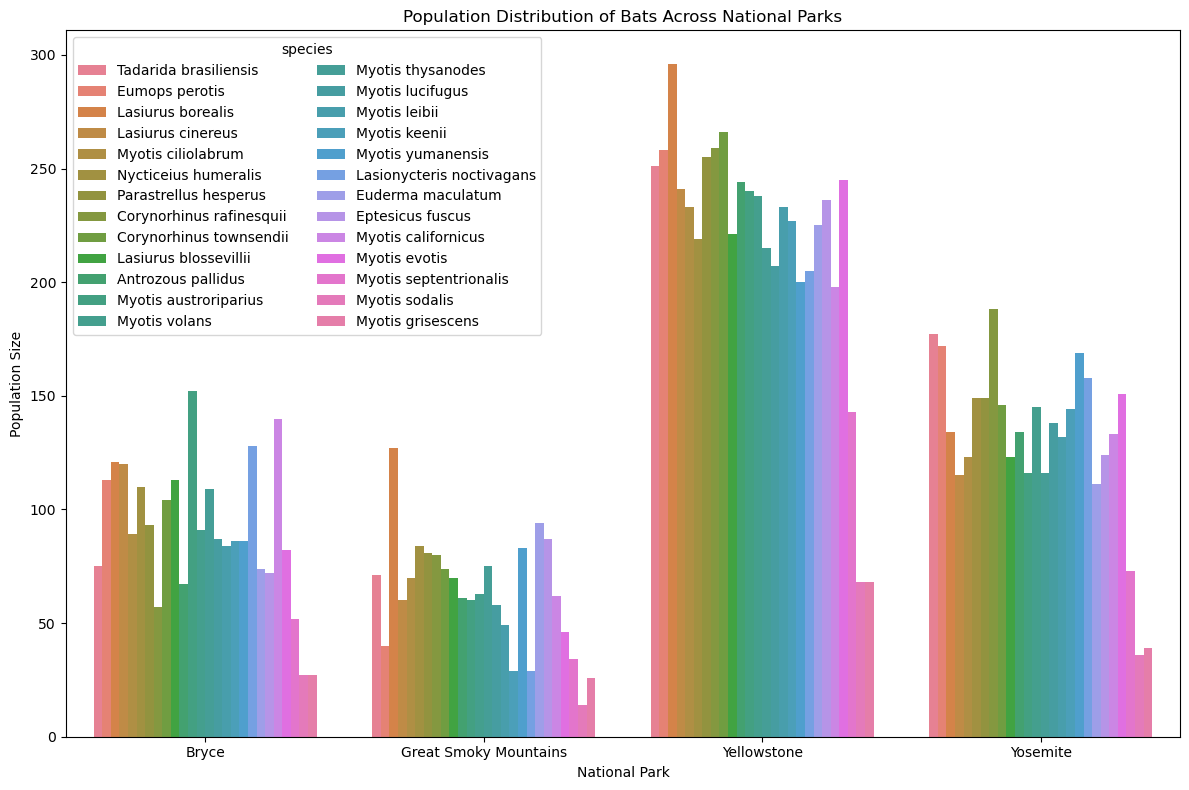

In [113]:
bat_order = bat_df.sort_values('conservation_status')['species'].unique()
plt.figure(figsize = (12, 8))
sns.barplot(
    data = bat_df,
    x = 'national_park',
    y = 'num_observed',
    hue = 'species',
    hue_order = bat_order,
)
plt.xlabel('National Park')
plt.ylabel('Population Size')
plt.title('Population Distribution of Bats Across National Parks')
plt.legend(title = 'species', ncol = 2, loc = 'upper left')
plt.tight_layout()
plt.show()

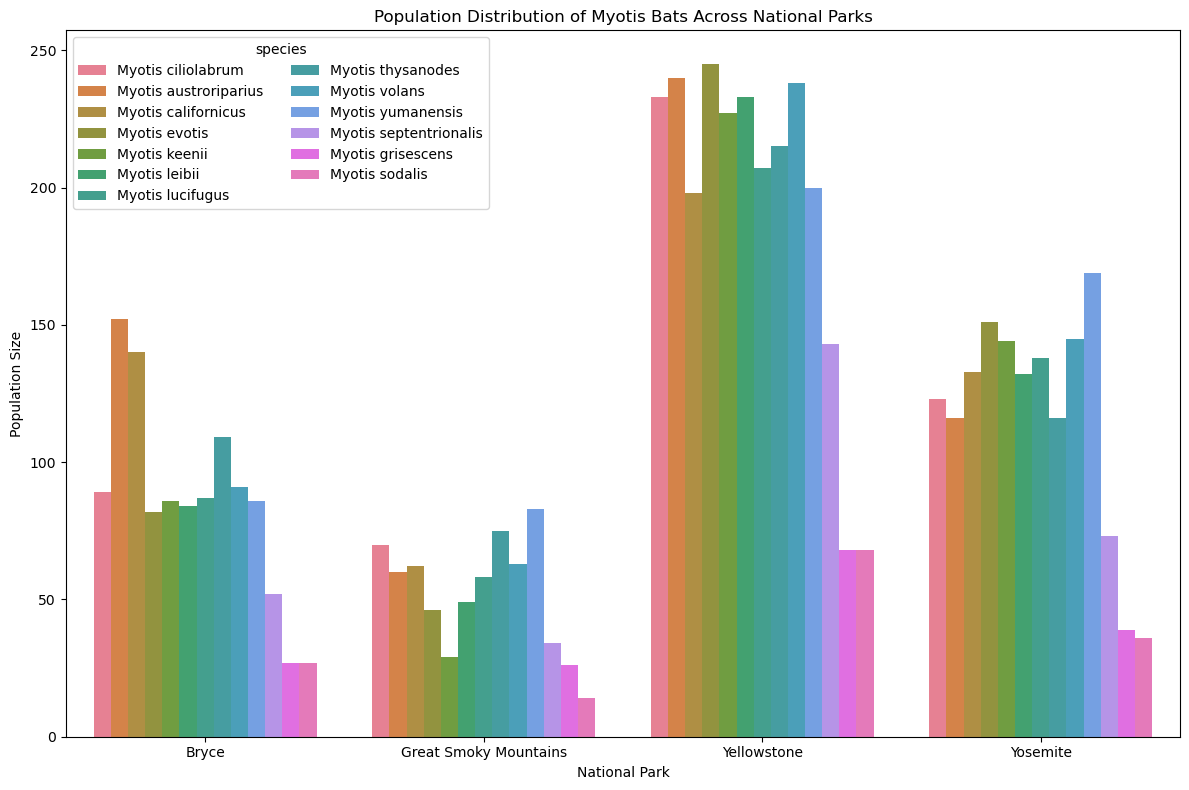

In [114]:
myotis_order = myotis_df.sort_values('conservation_status')['species'].unique()
plt.figure(figsize = (12, 8))
sns.barplot(
    data = myotis_df,
    x = 'national_park',
    y = 'num_observed',
    hue = 'species',
    hue_order = myotis_order,
)
plt.xlabel('National Park')
plt.ylabel('Population Size')
plt.title('Population Distribution of Myotis Bats Across National Parks')
plt.legend(title = 'species', ncol = 2)
plt.tight_layout()
plt.show()

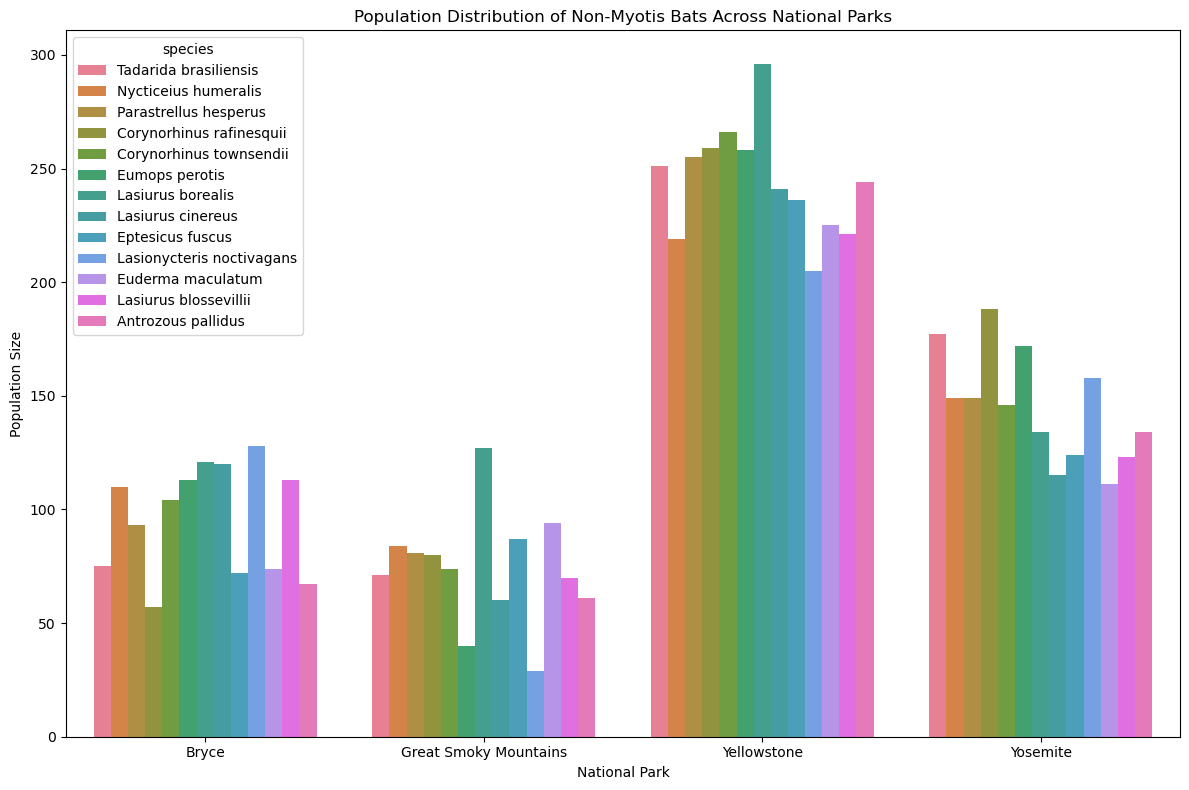

In [115]:
non_myotis_order = non_myotis_df.sort_values('conservation_status')['species'].unique()
plt.figure(figsize = (12, 8))
sns.barplot(
    data = non_myotis_df,
    x = 'national_park',
    y = 'num_observed',
    hue = 'species',
    hue_order = non_myotis_order,
)
plt.xlabel('National Park')
plt.ylabel('Population Size')
plt.title('Population Distribution of Non-Myotis Bats Across National Parks')
# plt.legend(title = 'species', ncol = 2)
plt.tight_layout()
plt.show()

In [116]:
correlation_matrix = bat_df.pivot(index='species', columns='national_park', values='relative_prevalence').corr()
print(correlation_matrix)

national_park             Bryce  Great Smoky Mountains  Yellowstone  Yosemite
national_park                                                                
Bryce                  1.000000               0.319108     0.576081  0.441607
Great Smoky Mountains  0.319108               1.000000     0.642037  0.406724
Yellowstone            0.576081               0.642037     1.000000  0.800292
Yosemite               0.441607               0.406724     0.800292  1.000000


In [117]:
correlation_matrix = myotis_df.pivot(index='species', columns='national_park', values='myotis_relative_prevalence').corr()
print(correlation_matrix)

national_park             Bryce  Great Smoky Mountains  Yellowstone  Yosemite
national_park                                                                
Bryce                  1.000000               0.675602     0.754377  0.638150
Great Smoky Mountains  0.675602               1.000000     0.660143  0.704245
Yellowstone            0.754377               0.660143     1.000000  0.889713
Yosemite               0.638150               0.704245     0.889713  1.000000


In [118]:
correlation_matrix = non_myotis_df.pivot(index='species', columns='national_park', values='non_myotis_relative_prevalence').corr()
print(correlation_matrix)

national_park             Bryce  Great Smoky Mountains  Yellowstone  Yosemite
national_park                                                                
Bryce                  1.000000              -0.216732    -0.072595 -0.174844
Great Smoky Mountains -0.216732               1.000000     0.511113 -0.305075
Yellowstone           -0.072595               0.511113     1.000000  0.222201
Yosemite              -0.174844              -0.305075     0.222201  1.000000


In [119]:
# it appears that bats have loosely similar distributions of relative population across the four national parks, however
# relative population among myotis species appears much more consistent than when all bat species are compared relative to eachother.
# this is futher supported by the results from the non_myotis_df correlation matrix, which indicates a lack of consistent relative variety
# among non-myotis bat species across the four national parks in this dataset.

In [120]:
# this has been an interesting project. a readme with some context regarding the data that was assigned for this project would
# have addressed, or at least mitigated to some degree, some of my issues with scoping out this project. i would also like to think
# that a readme would have helped me to formulate better questions to frame my analysis around, but who's to say.